In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the training and testing datasets
training_file = "../../../data/raw/Training.csv"
testing_file = "../../../data/raw/Testing.csv"
disease_training = pd.read_csv(training_file)
disease_testing = pd.read_csv(testing_file)

# Drop any unwanted columns (e.g., unnamed columns)
if 'Unnamed: 133' in disease_training.columns:
    disease_training.drop(['Unnamed: 133'], axis=1, inplace=True)

disease_training

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [4]:
# Split into predictors (all columns except the target) and response (target column)
predictors_training = disease_training.drop(columns=['prognosis'])
predictors_testing = disease_testing.drop(columns=['prognosis'])

response_training = disease_training['prognosis']
response_testing = disease_testing['prognosis']

predictors_training

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Fungal infection
{'nodal_skin_eruptions': inf, 'dischromic _patches': inf, 'itching': 66.78947368421052, 'skin_rash': 54.716814159292035, 'continuous_sneezing': 0.0}
----------------------------------------------------------------------------------------------------


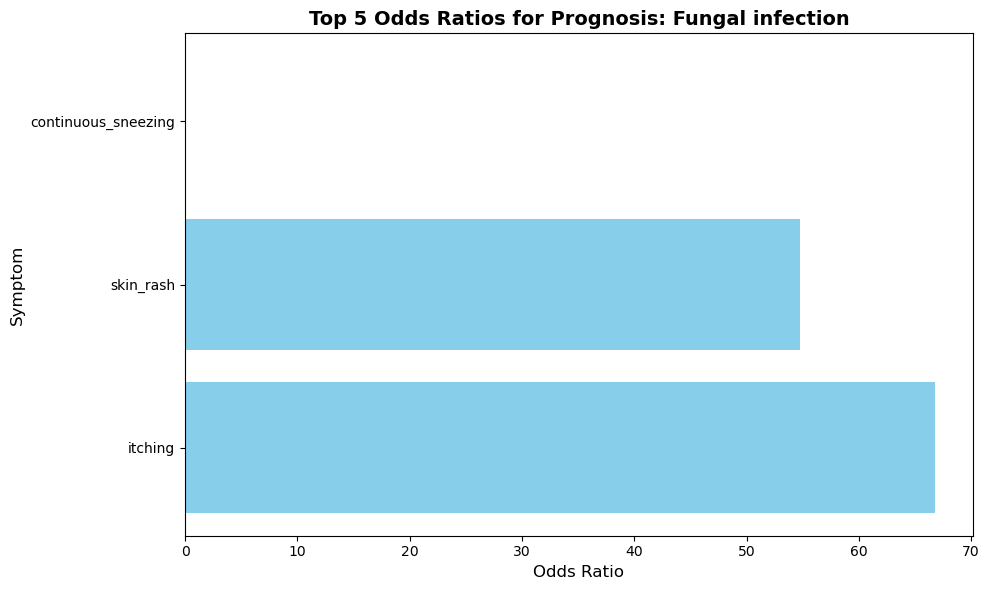

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Allergy
{'shivering': inf, 'watering_from_eyes': inf, 'continuous_sneezing': 369.9473684210526, 'chills': 53.60869565217392, 'itching': 0.0}
----------------------------------------------------------------------------------------------------


C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


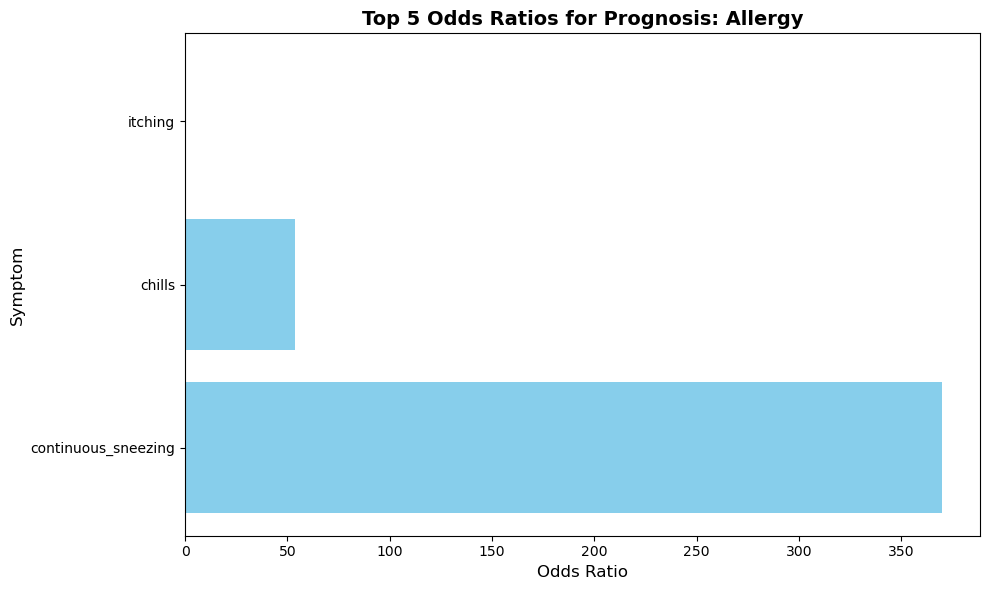

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: GERD
{'ulcers_on_tongue': inf, 'stomach_pain': 825.4444444444443, 'acidity': 369.9473684210526, 'cough': 183.66666666666669, 'chest_pain': 137.70103092783503}
----------------------------------------------------------------------------------------------------


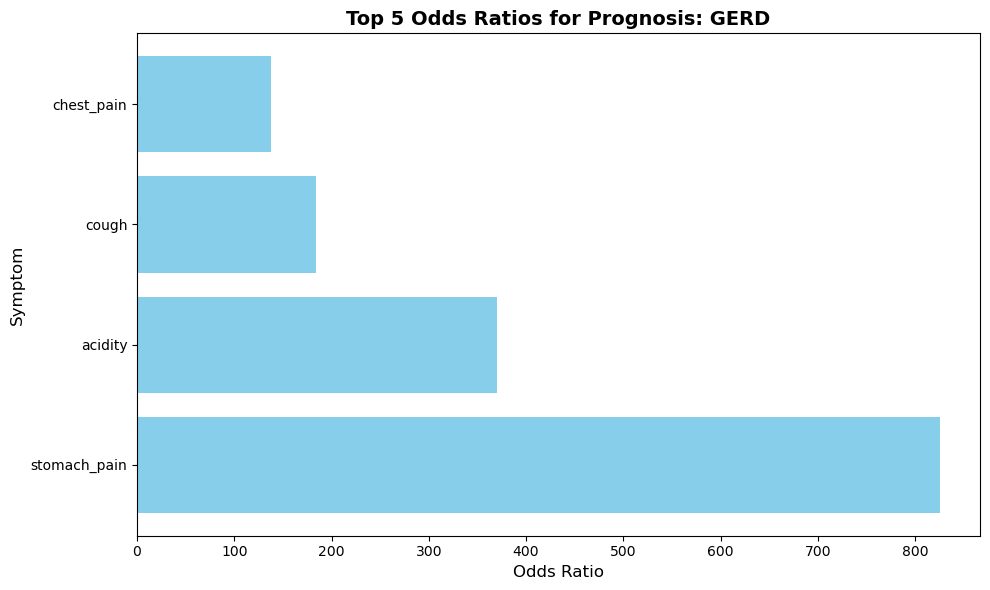

Prognosis: Chronic cholestasis
{'itching': 142.70212765957444, 'yellowing_of_eyes': 110.91452991452992, 'yellowish_skin': 95.28571428571428, 'abdominal_pain': 80.34640522875817, 'nausea': 69.37209302325581}
----------------------------------------------------------------------------------------------------


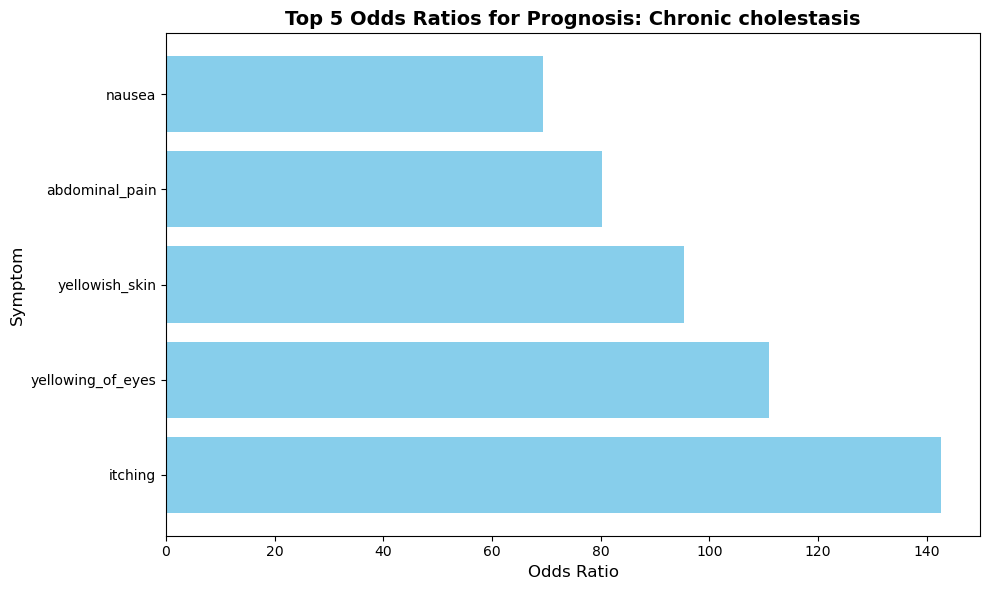

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Drug Reaction
{'spotting_ urination': inf, 'burning_micturition': 390.99999999999994, 'stomach_pain': 369.9473684210526, 'itching': 142.70212765957444, 'skin_rash': 54.716814159292035}
----------------------------------------------------------------------------------------------------


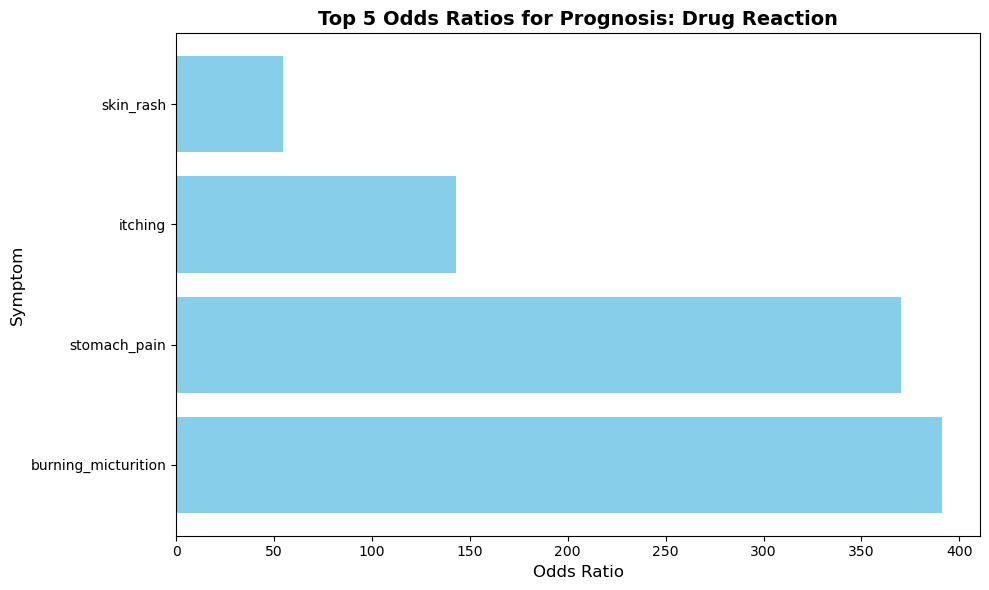

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Peptic ulcer diseae
{'passage_of_gases': inf, 'internal_itching': inf, 'indigestion': 369.9473684210526, 'abdominal_pain': 80.34640522875817, 'loss_of_appetite': 32.37931034482759}
----------------------------------------------------------------------------------------------------


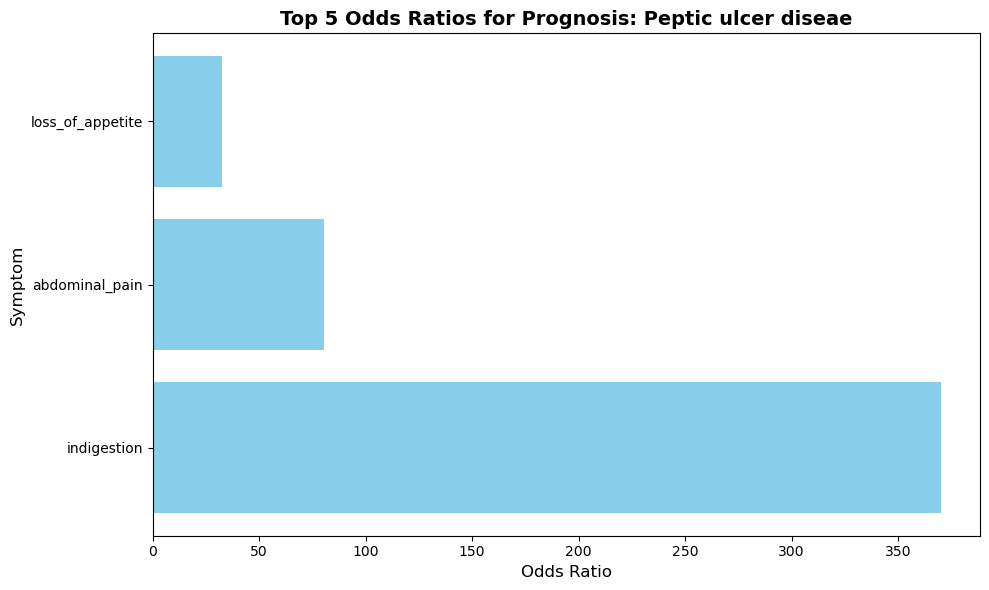

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: AIDS
{'muscle_wasting': inf, 'patches_in_throat': inf, 'extra_marital_contacts': inf, 'high_fever': 54.07692307692307, 'itching': 0.0}
----------------------------------------------------------------------------------------------------


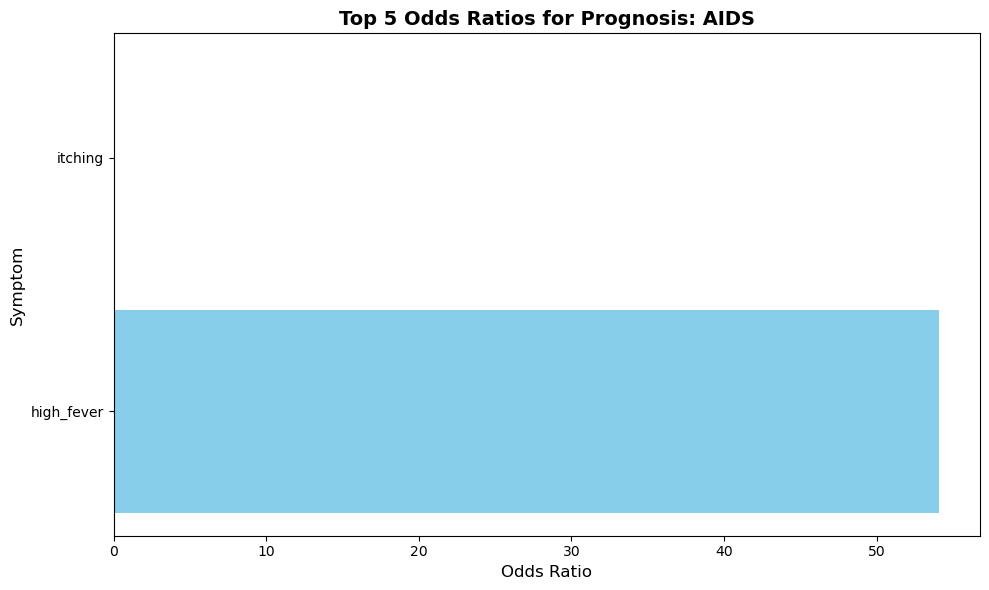

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Diabetes 
{'irregular_sugar_level': inf, 'increased_appetite': inf, 'polyuria': inf, 'restlessness': 781.0, 'obesity': 781.0}
----------------------------------------------------------------------------------------------------


C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


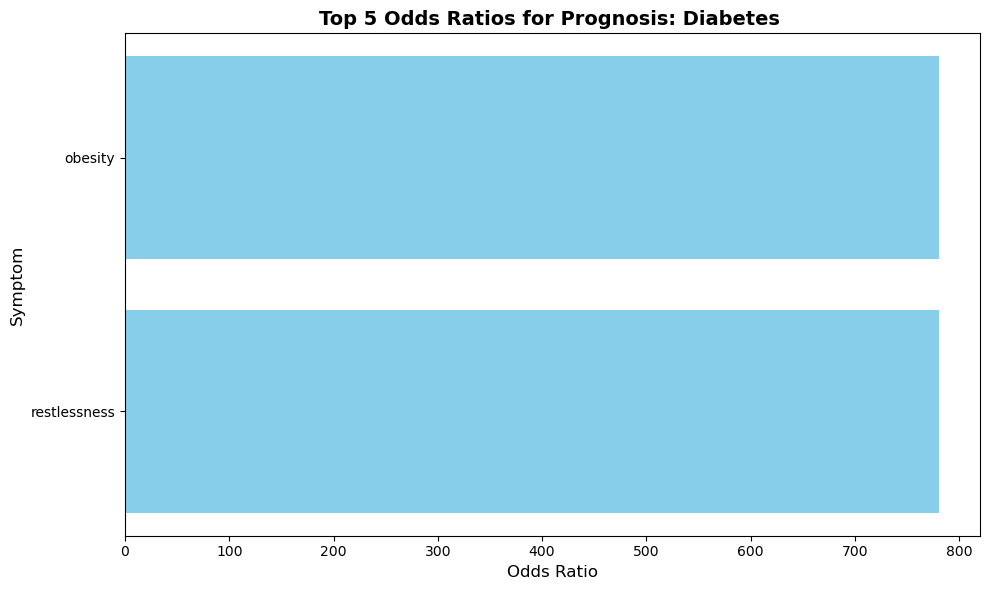

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Gastroenteritis
{'sunken_eyes': inf, 'dehydration': inf, 'diarrhoea': 183.66666666666669, 'vomiting': 14.9202657807309, 'itching': 0.0}
----------------------------------------------------------------------------------------------------


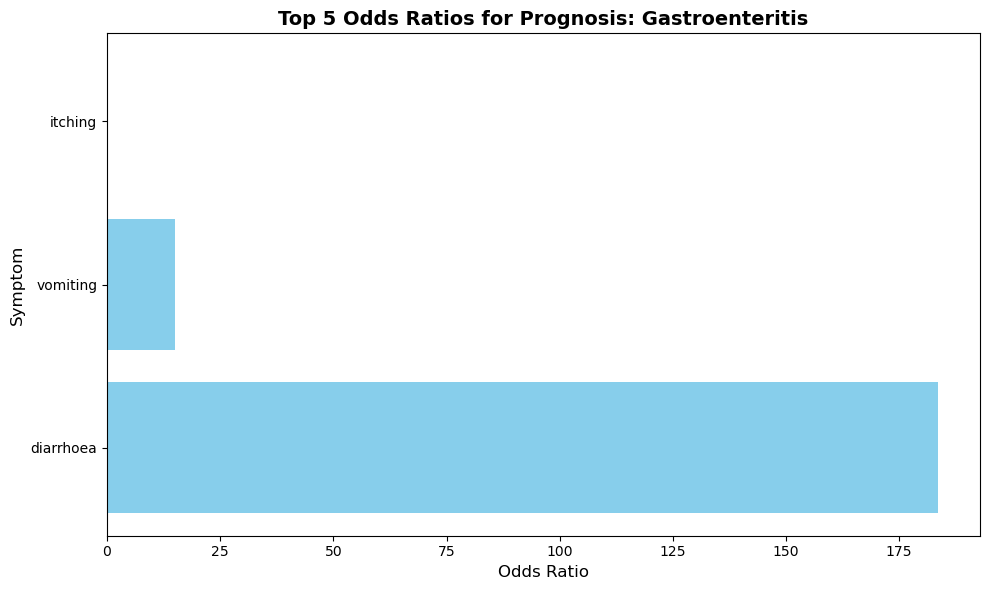

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Bronchial Asthma
{'mucoid_sputum': inf, 'family_history': 781.0, 'breathlessness': 252.42857142857142, 'cough': 85.73684210526315, 'high_fever': 54.07692307692307}
----------------------------------------------------------------------------------------------------


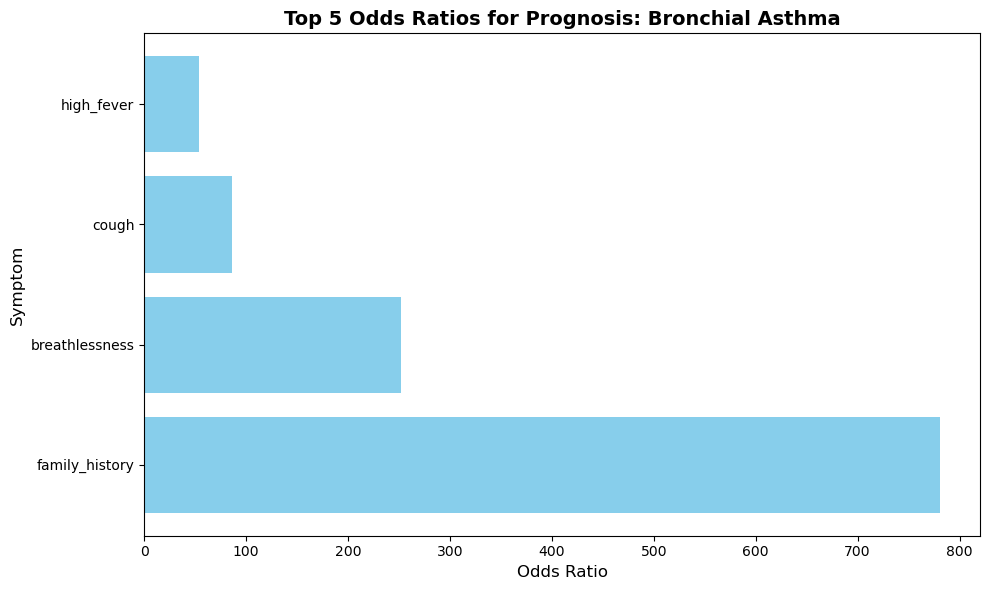

Prognosis: Hypertension 
{'lack_of_concentration': inf, 'loss_of_balance': 381.0, 'dizziness': 180.4736842105263, 'chest_pain': 64.46938775510205, 'headache': 33.10526315789473}
----------------------------------------------------------------------------------------------------


C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


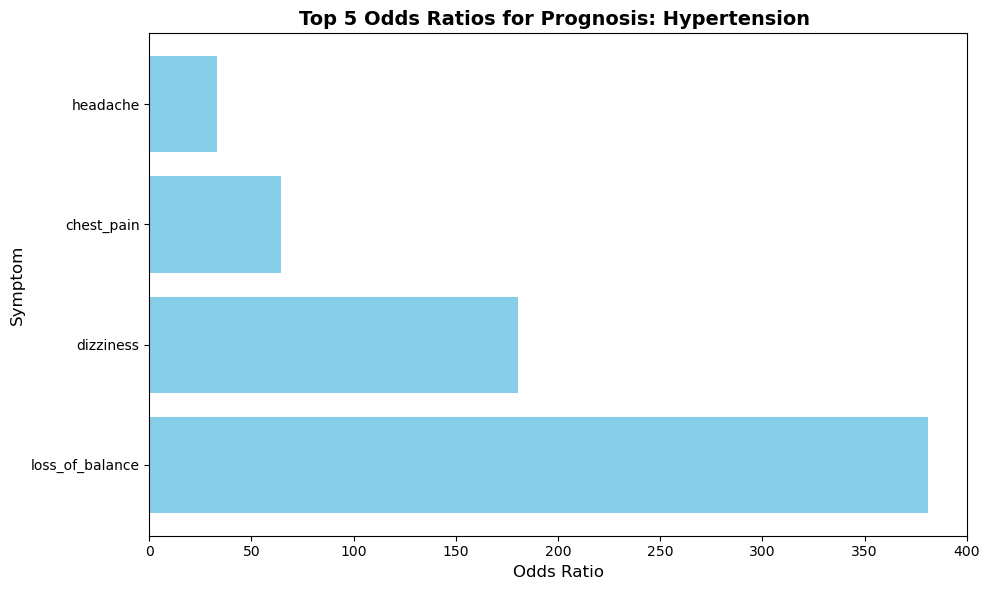

Prognosis: Migraine
{'visual_disturbances': inf, 'acidity': 825.4444444444443, 'indigestion': 825.4444444444443, 'stiff_neck': 781.0, 'depression': 741.0}
----------------------------------------------------------------------------------------------------


C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


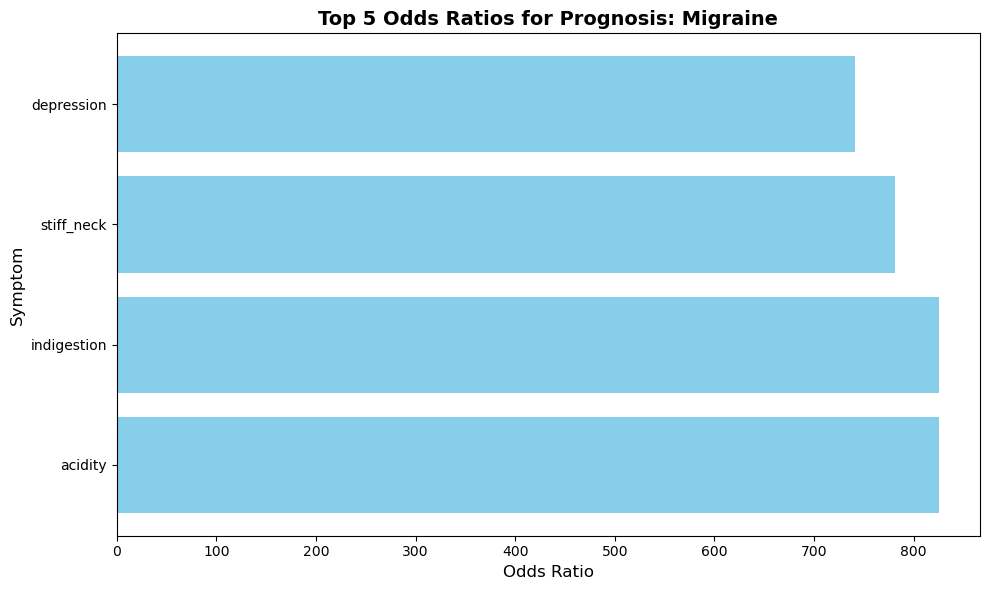

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Cervical spondylosis
{'weakness_in_limbs': inf, 'neck_pain': 781.0, 'dizziness': 391.8108108108108, 'loss_of_balance': 381.0, 'back_pain': 351.0}
----------------------------------------------------------------------------------------------------


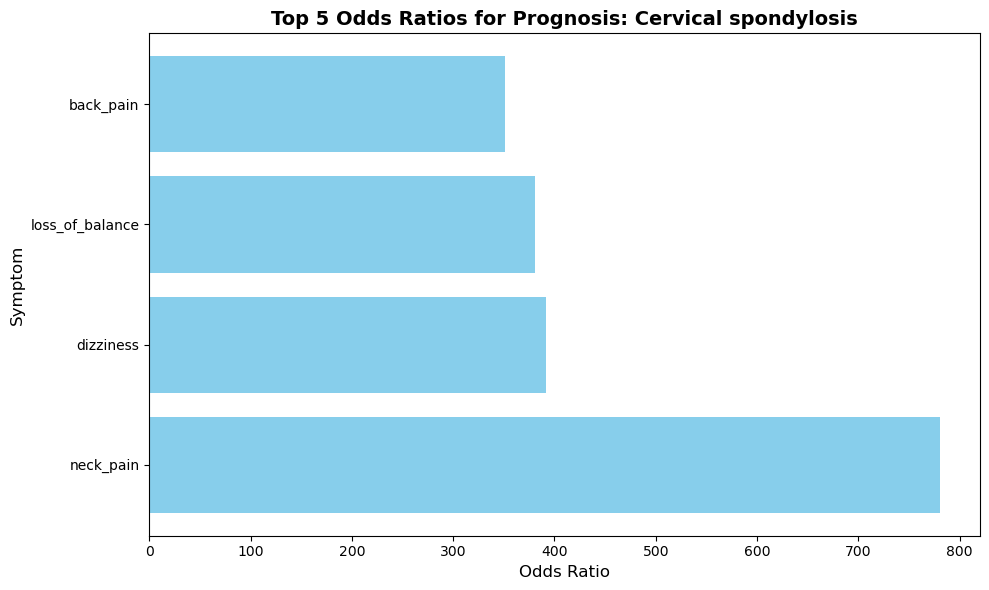

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Paralysis (brain hemorrhage)
{'weakness_of_one_body_side': inf, 'altered_sensorium': inf, 'headache': 33.10526315789473, 'vomiting': 14.9202657807309, 'itching': 0.0}
----------------------------------------------------------------------------------------------------


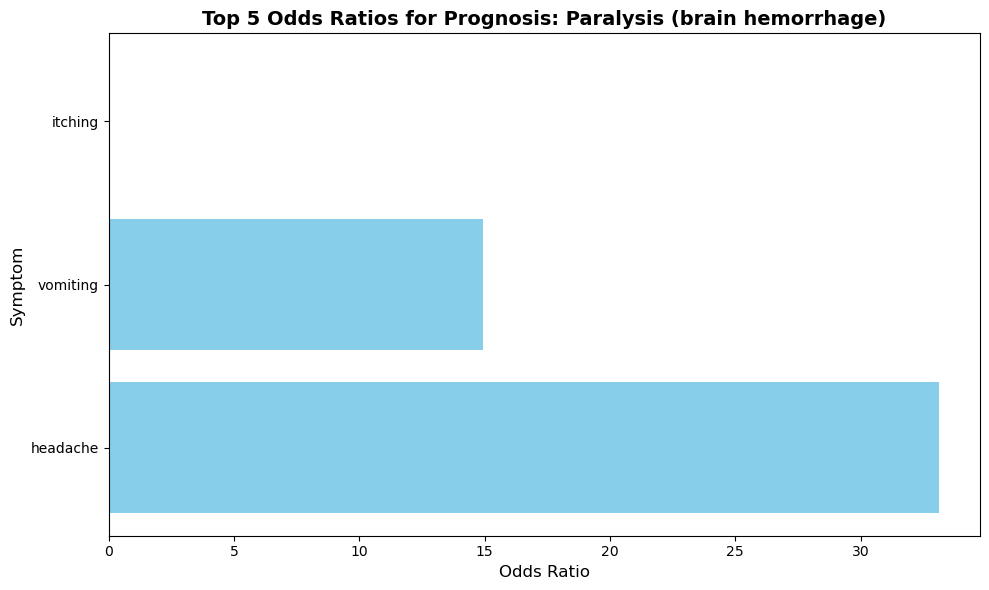

Prognosis: Jaundice
{'weight_loss': 247.66666666666666, 'dark_urine': 181.0, 'itching': 142.70212765957444, 'yellowish_skin': 95.28571428571428, 'abdominal_pain': 80.34640522875817}
----------------------------------------------------------------------------------------------------


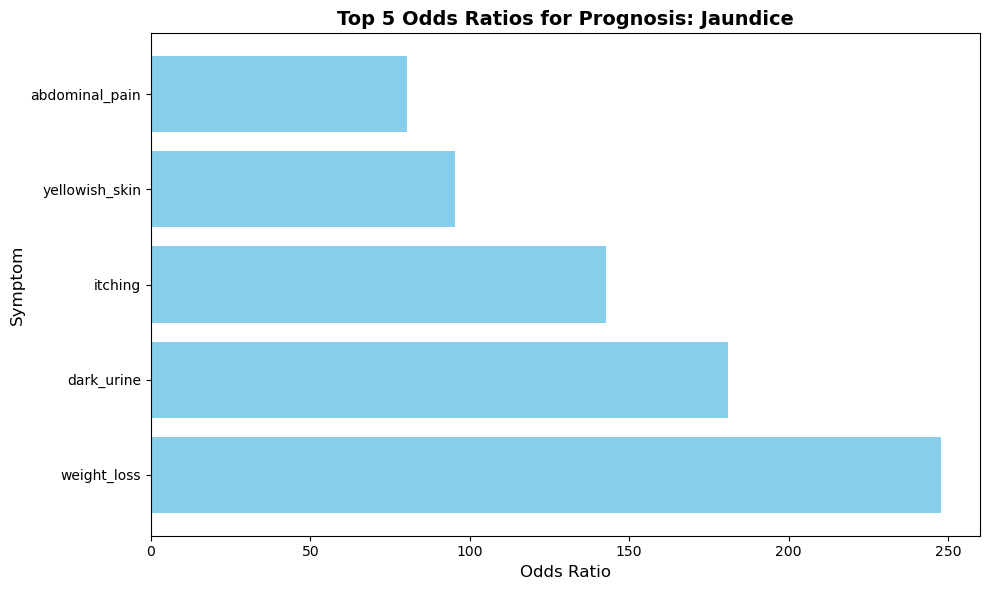

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Malaria
{'muscle_pain': inf, 'sweating': 142.70212765957444, 'chills': 114.33333333333333, 'diarrhoea': 85.73684210526315, 'headache': 70.41176470588236}
----------------------------------------------------------------------------------------------------


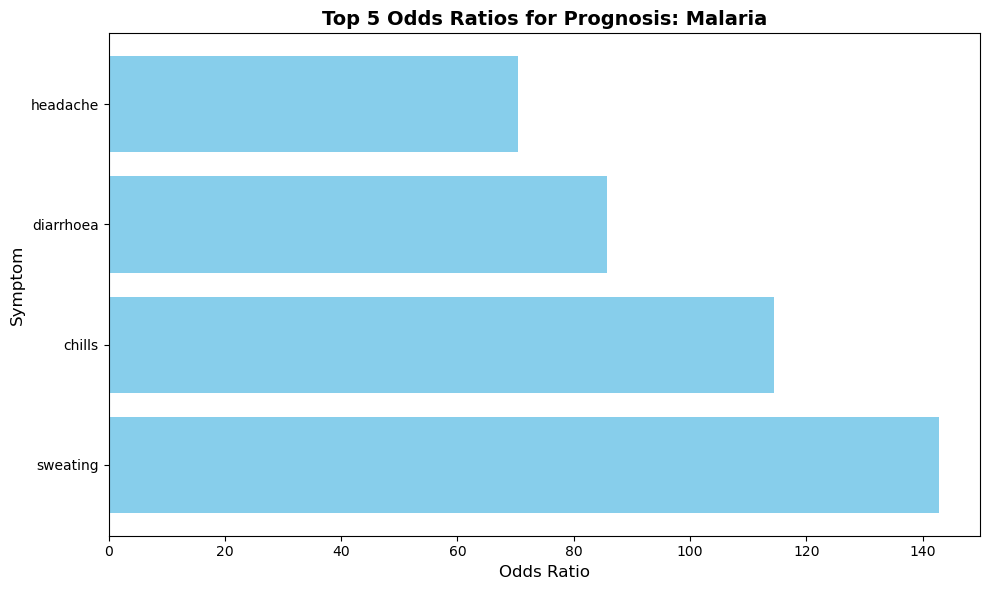

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Chicken pox
{'malaise': inf, 'red_spots_over_body': inf, 'swelled_lymph_nodes': 370.7435897435897, 'mild_fever': 361.0, 'lethargy': 247.66666666666666}
----------------------------------------------------------------------------------------------------


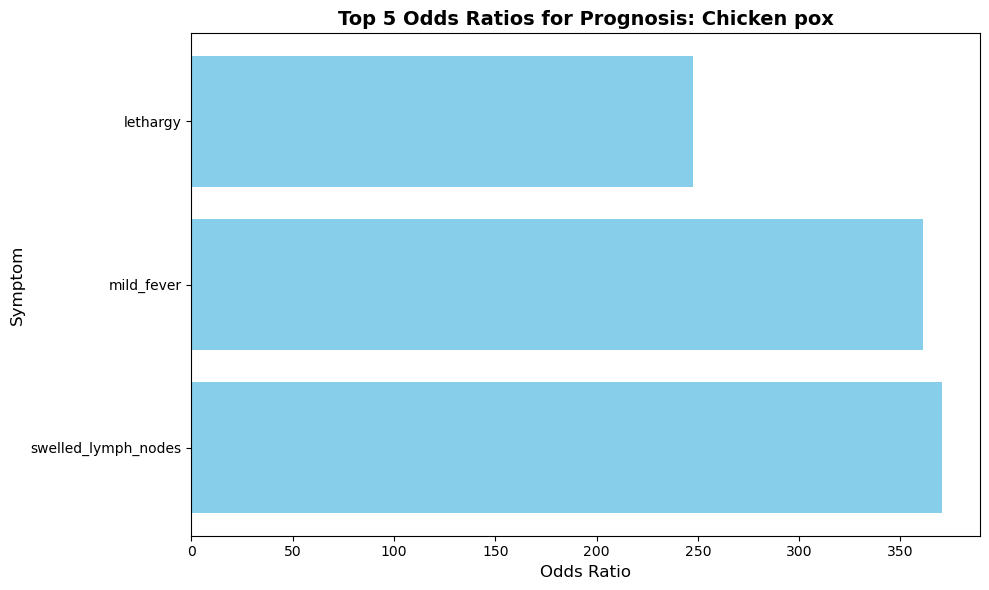

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero

Prognosis: Dengue
{'headache': inf, 'nausea': inf, 'loss_of_appetite': inf, 'pain_behind_the_eyes': inf, 'back_pain': inf}
----------------------------------------------------------------------------------------------------


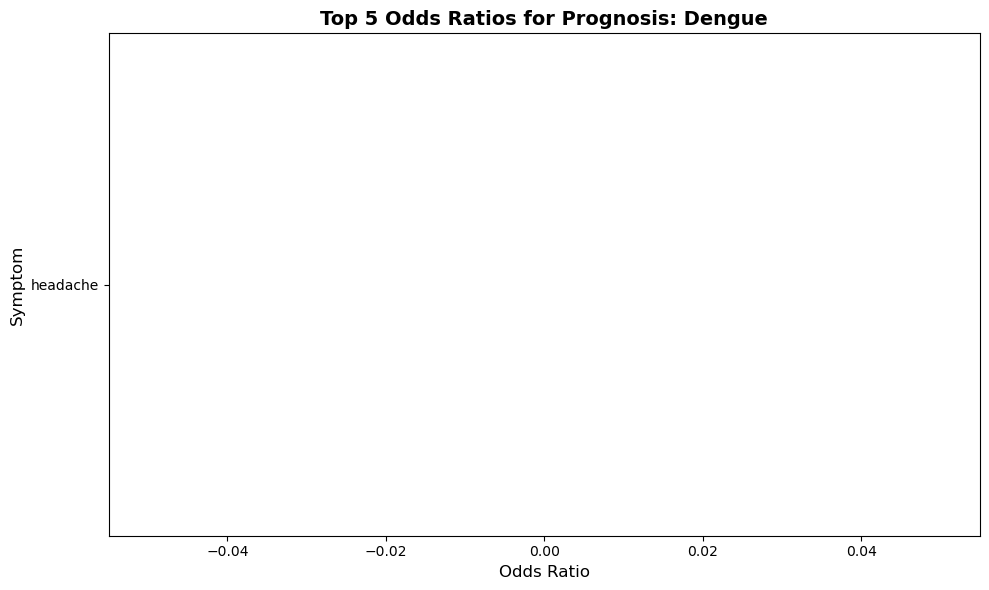

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero

Prognosis: Typhoid
{'chills': inf, 'fatigue': inf, 'high_fever': inf, 'toxic_look_(typhos)': inf, 'belly_pain': inf}
----------------------------------------------------------------------------------------------------


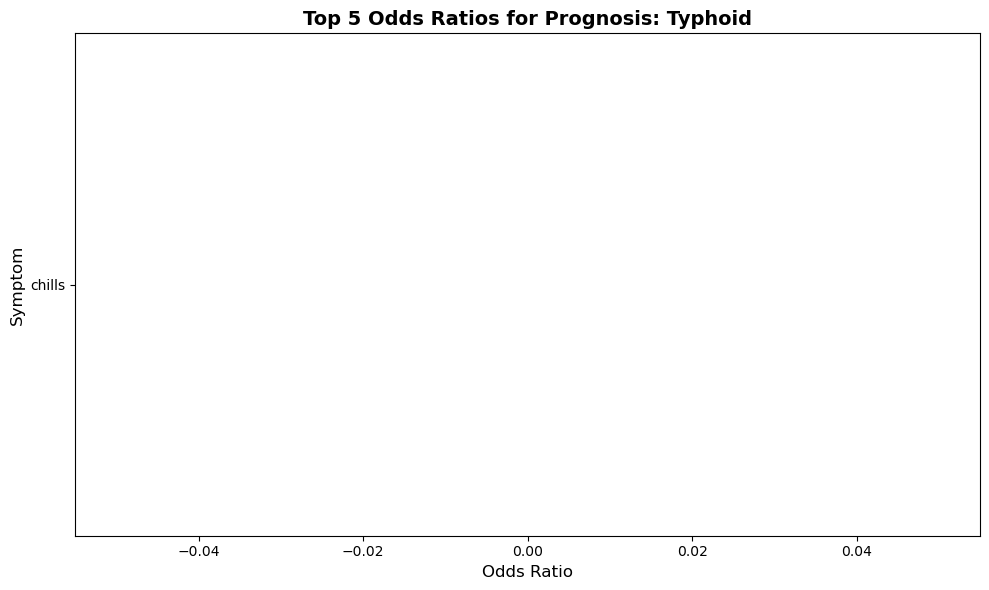

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: hepatitis A
{'mild_fever': inf, 'yellowing_of_eyes': inf, 'muscle_pain': inf, 'diarrhoea': 183.66666666666669, 'dark_urine': 181.0}
----------------------------------------------------------------------------------------------------


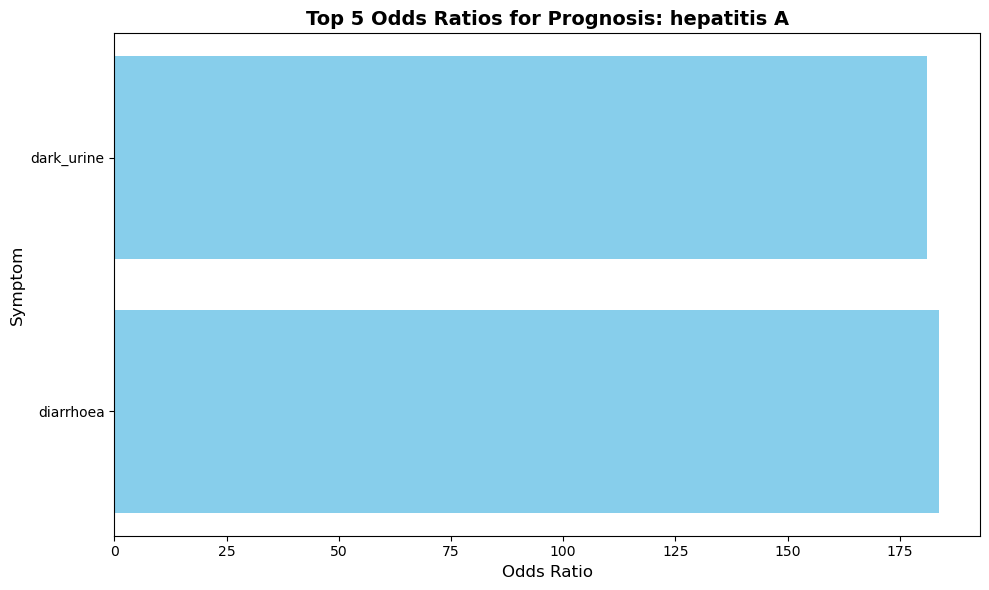

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Hepatitis B
{'yellow_urine': inf, 'yellowing_of_eyes': inf, 'malaise': inf, 'receiving_blood_transfusion': inf, 'receiving_unsterile_injections': inf}
----------------------------------------------------------------------------------------------------


C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


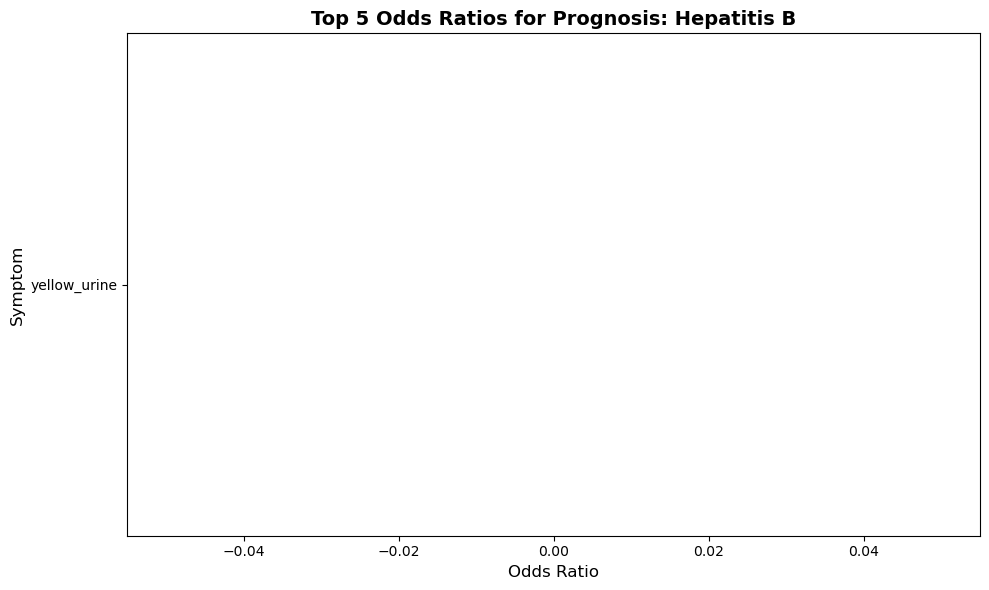

Prognosis: Hepatitis C
{'family_history': 781.0, 'yellowish_skin': 95.28571428571428, 'nausea': 69.37209302325581, 'loss_of_appetite': 68.86127167630057, 'yellowing_of_eyes': 52.016949152542374}
----------------------------------------------------------------------------------------------------


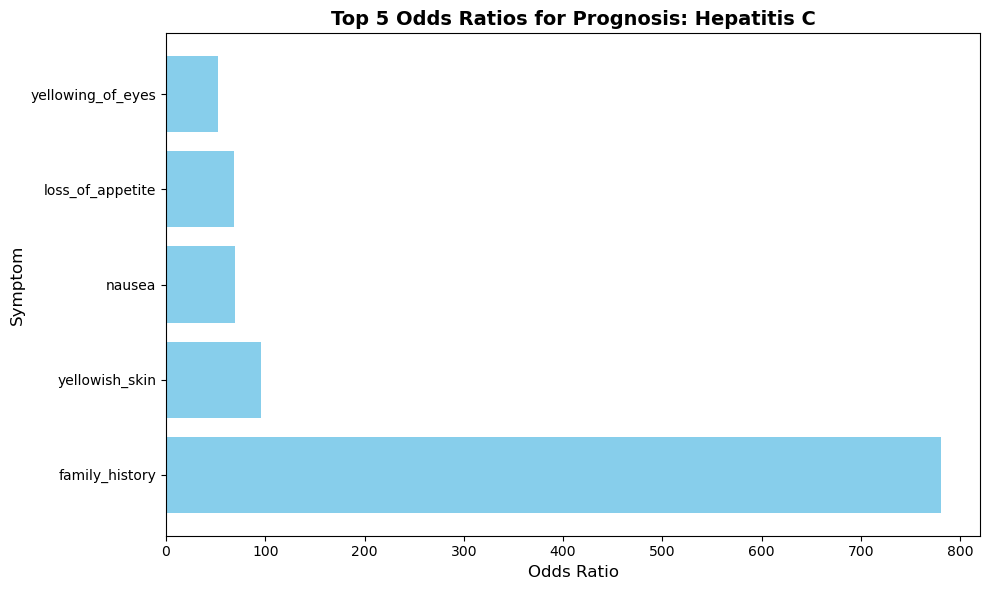

Prognosis: Hepatitis D
{'dark_urine': 181.0, 'joint_pain': 141.0, 'yellowing_of_eyes': 110.91452991452992, 'yellowish_skin': 95.28571428571428, 'abdominal_pain': 80.34640522875817}
----------------------------------------------------------------------------------------------------


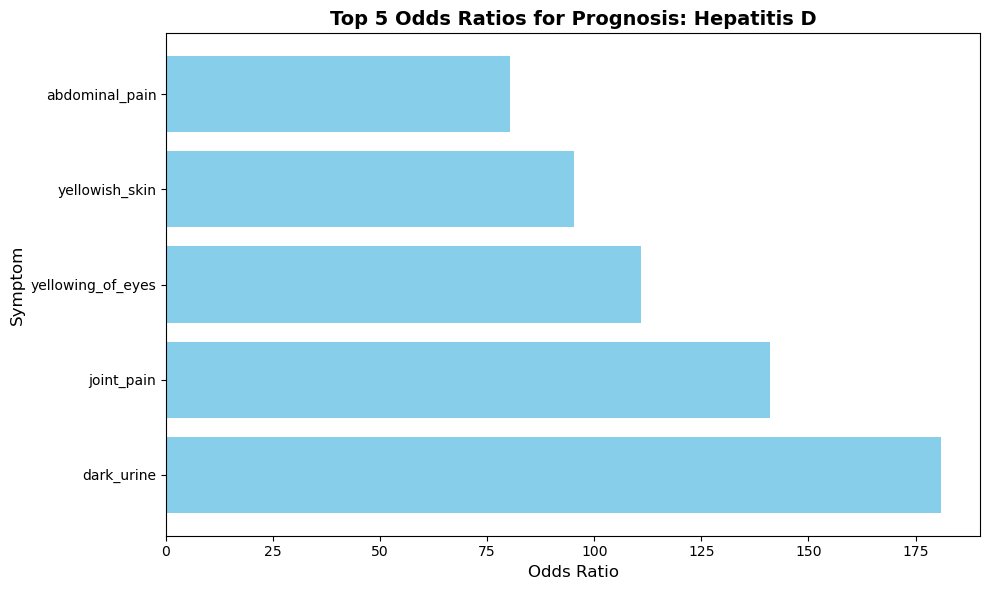

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero

Prognosis: Hepatitis E
{'loss_of_appetite': inf, 'abdominal_pain': inf, 'yellowing_of_eyes': inf, 'acute_liver_failure': inf, 'coma': inf}
----------------------------------------------------------------------------------------------------


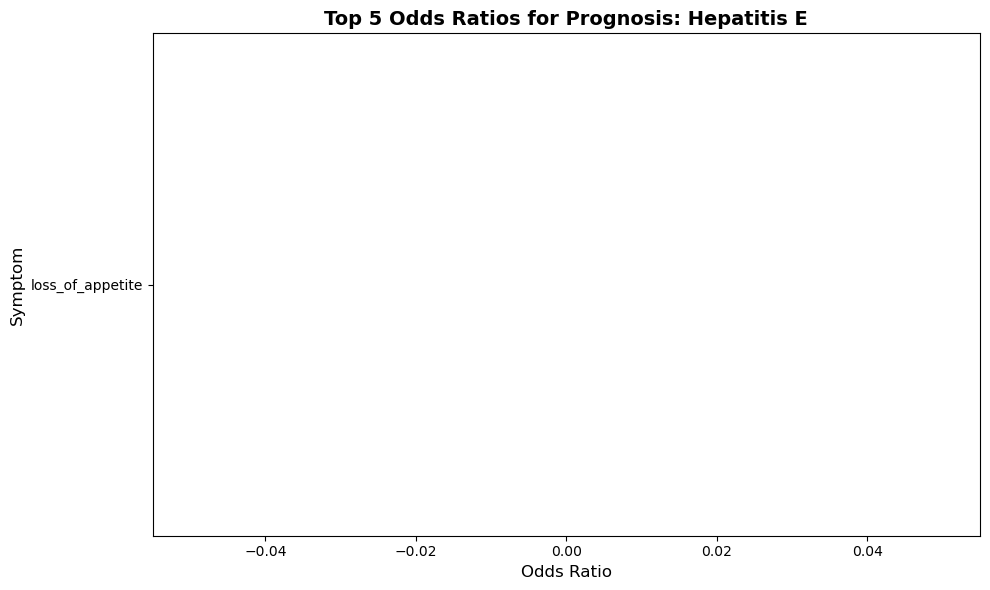

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Alcoholic hepatitis
{'swelling_of_stomach': inf, 'distention_of_abdomen': inf, 'history_of_alcohol_consumption': inf, 'fluid_overload.1': inf, 'yellowish_skin': 95.28571428571428}
----------------------------------------------------------------------------------------------------


C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


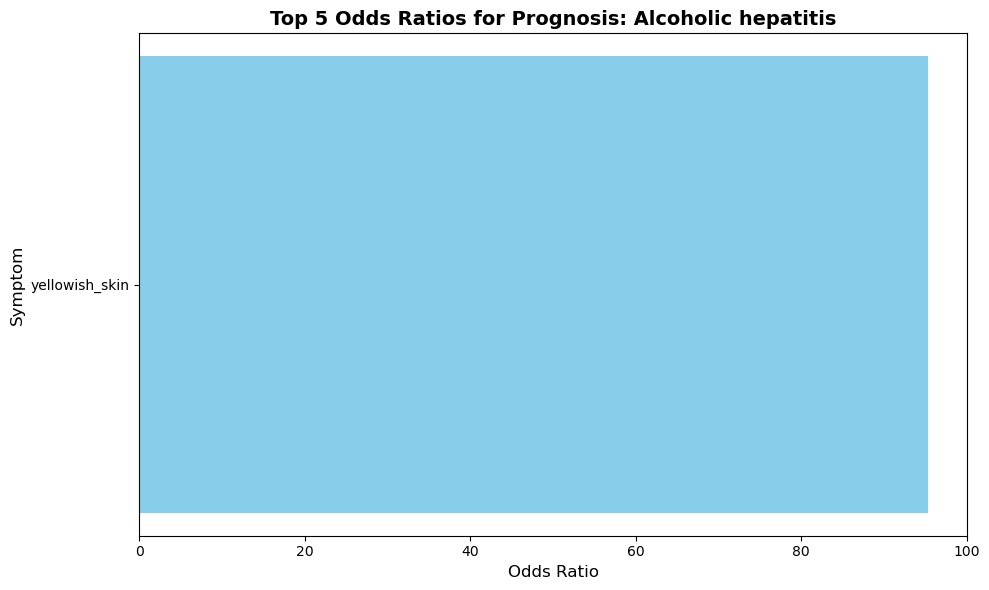

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero

Prognosis: Tuberculosis
{'loss_of_appetite': inf, 'mild_fever': inf, 'yellowing_of_eyes': inf, 'swelled_lymph_nodes': inf, 'malaise': inf}
----------------------------------------------------------------------------------------------------


C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


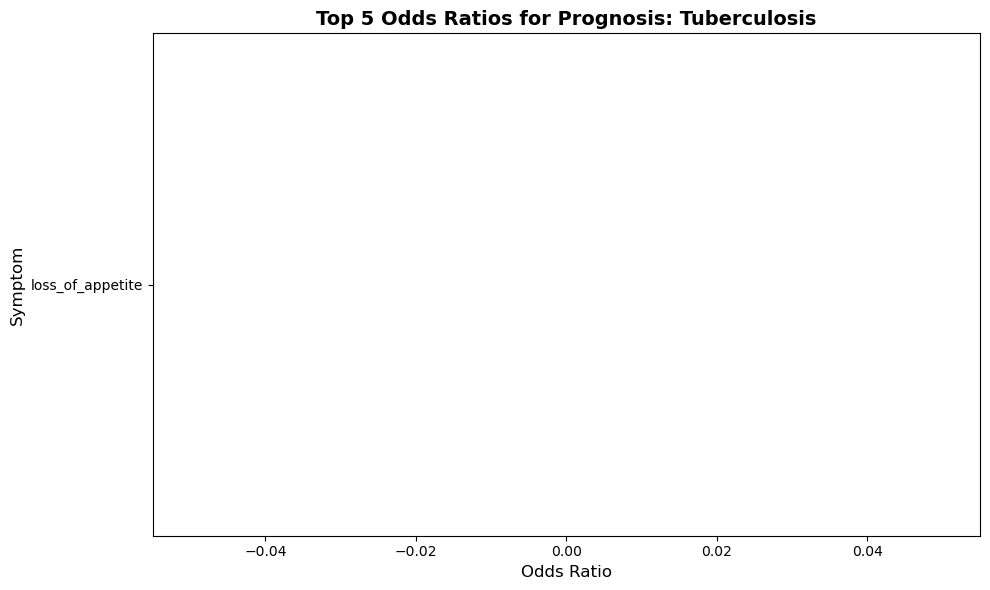

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero

Prognosis: Common Cold
{'phlegm': inf, 'throat_irritation': inf, 'redness_of_eyes': inf, 'sinus_pressure': inf, 'runny_nose': inf}
----------------------------------------------------------------------------------------------------


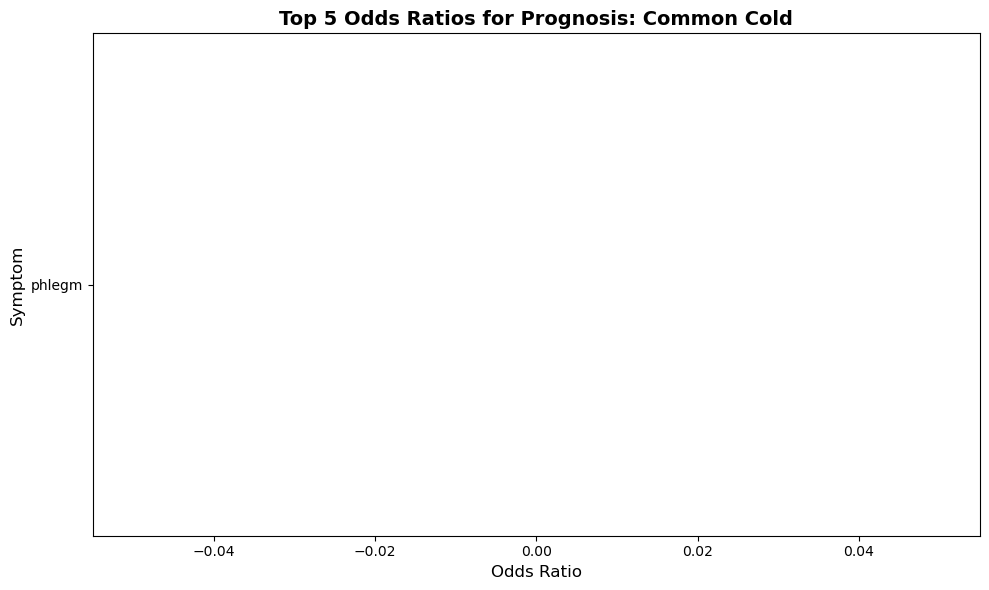

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Pneumonia
{'chest_pain': inf, 'fast_heart_rate': inf, 'rusty_sputum': inf, 'phlegm': 361.0, 'breathlessness': 252.42857142857142}
----------------------------------------------------------------------------------------------------


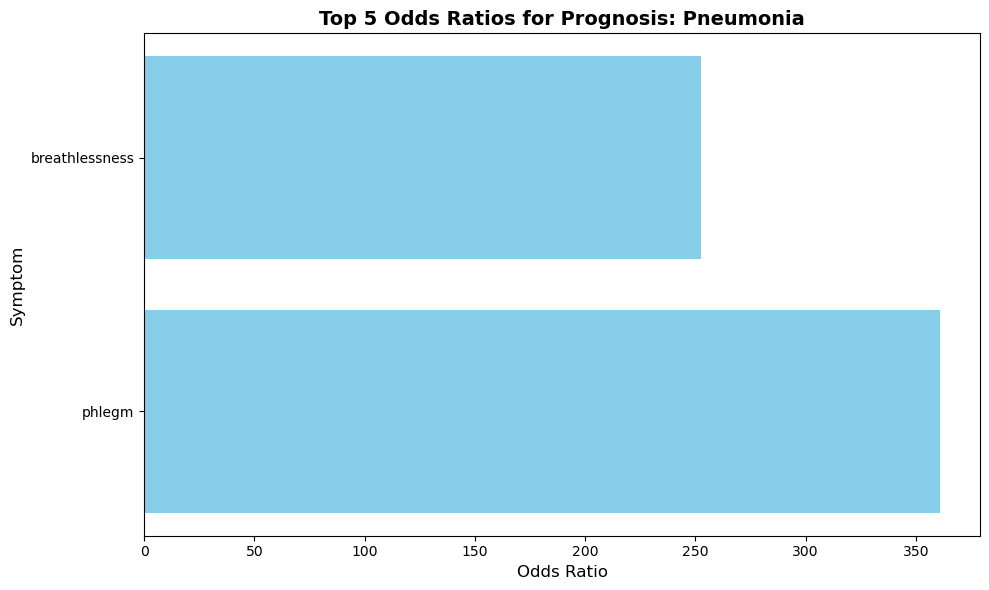

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Dimorphic hemmorhoids(piles)
{'pain_during_bowel_movements': inf, 'pain_in_anal_region': inf, 'bloody_stool': inf, 'irritation_in_anus': inf, 'constipation': 781.0}
----------------------------------------------------------------------------------------------------


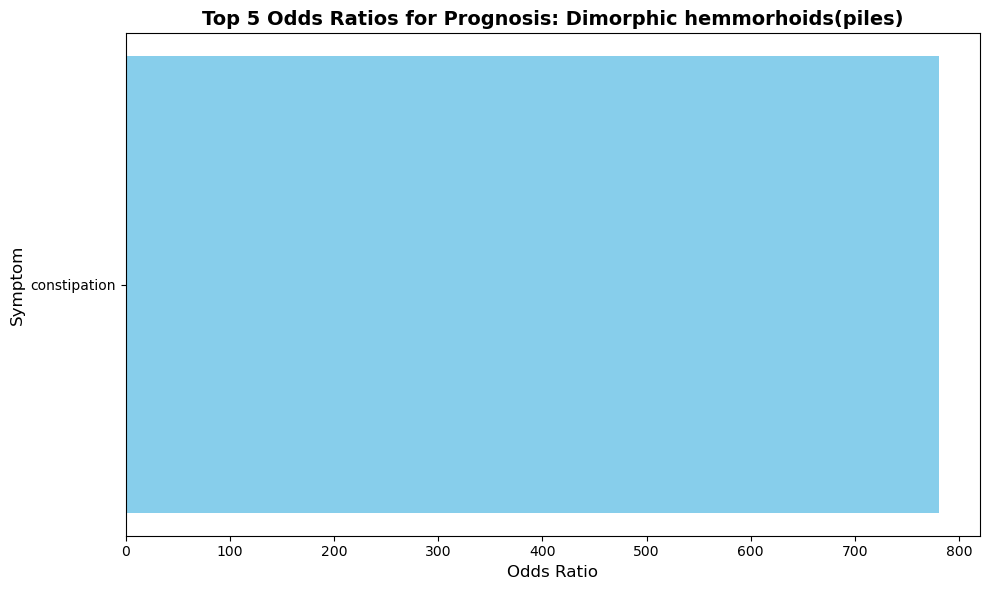

Prognosis: Heart attack
{'chest_pain': 137.70103092783503, 'breathlessness': 117.3157894736842, 'sweating': 66.78947368421052, 'vomiting': 14.9202657807309, 'itching': 0.0}
----------------------------------------------------------------------------------------------------


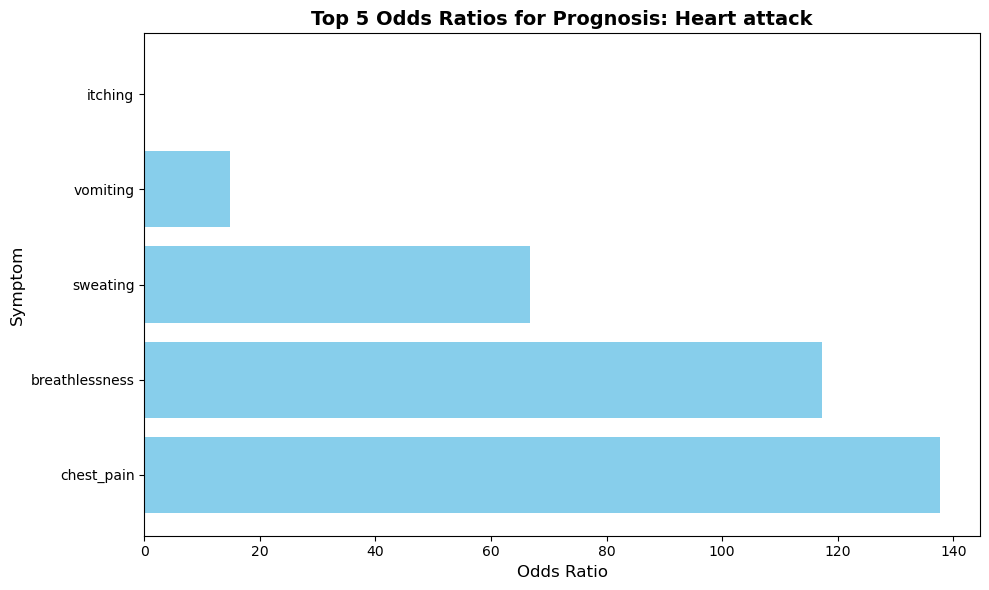

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero

Prognosis: Varicose veins
{'cramps': inf, 'bruising': inf, 'swollen_legs': inf, 'swollen_blood_vessels': inf, 'prominent_veins_on_calf': inf}
----------------------------------------------------------------------------------------------------


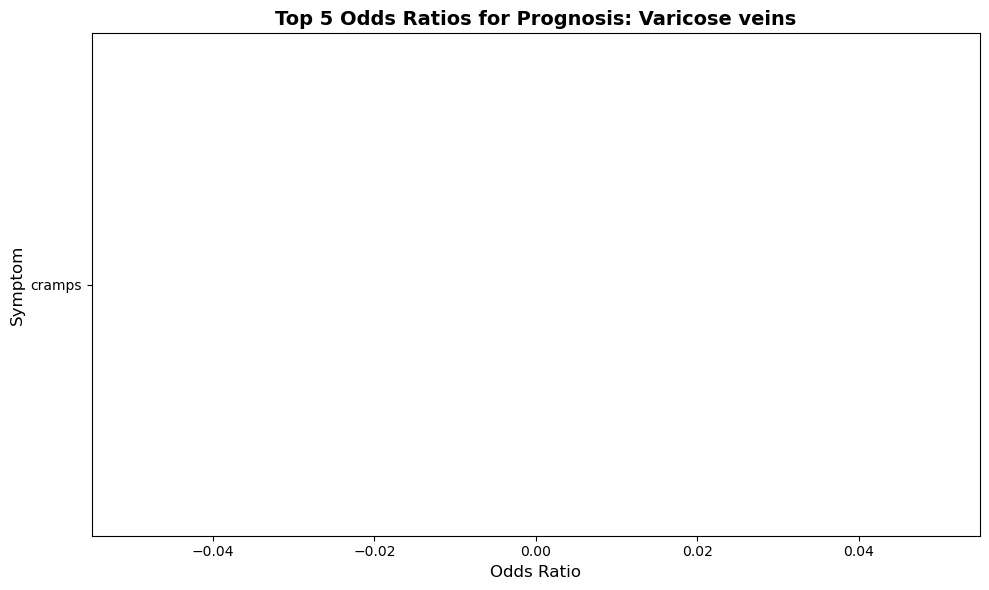

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero

Prognosis: Hypothyroidism
{'weight_gain': inf, 'cold_hands_and_feets': inf, 'puffy_face_and_eyes': inf, 'enlarged_thyroid': inf, 'brittle_nails': inf}
----------------------------------------------------------------------------------------------------


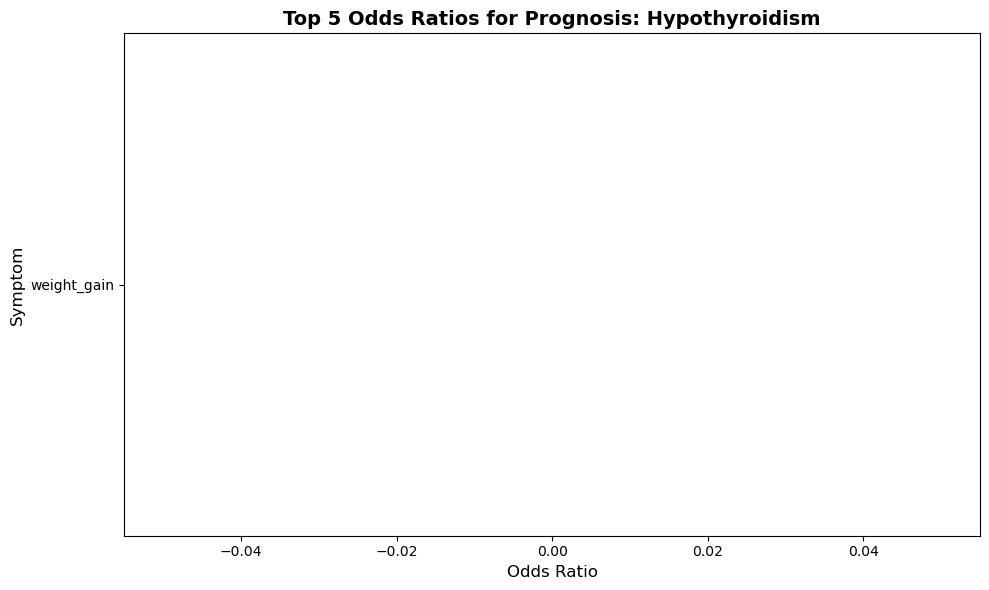

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Hyperthyroidism
{'muscle_weakness': inf, 'irritability': inf, 'abnormal_menstruation': inf, 'mood_swings': 781.0, 'restlessness': 781.0}
----------------------------------------------------------------------------------------------------


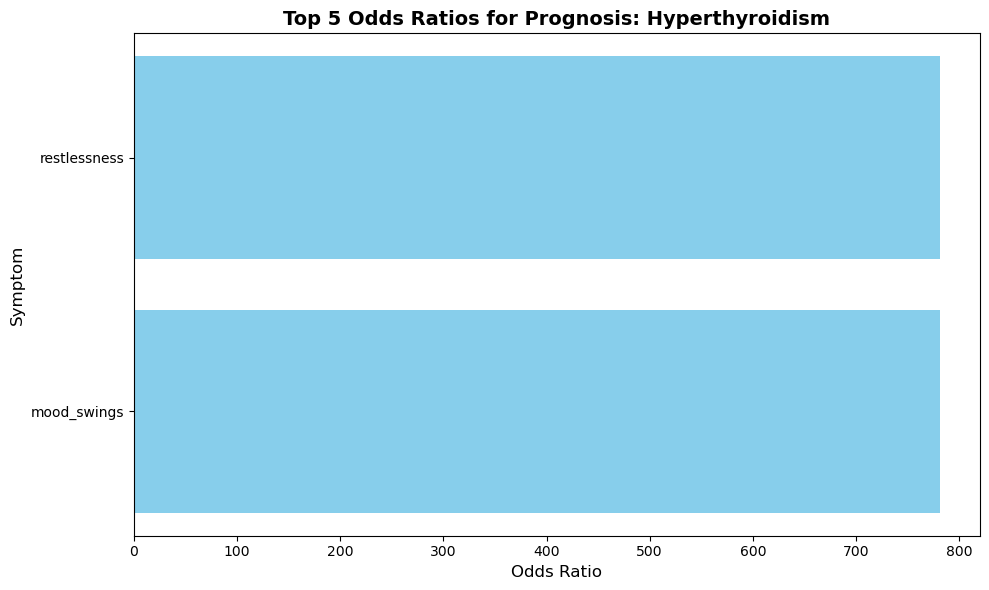

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero

Prognosis: Hypoglycemia
{'anxiety': inf, 'excessive_hunger': inf, 'drying_and_tingling_lips': inf, 'slurred_speech': inf, 'irritability': inf}
----------------------------------------------------------------------------------------------------


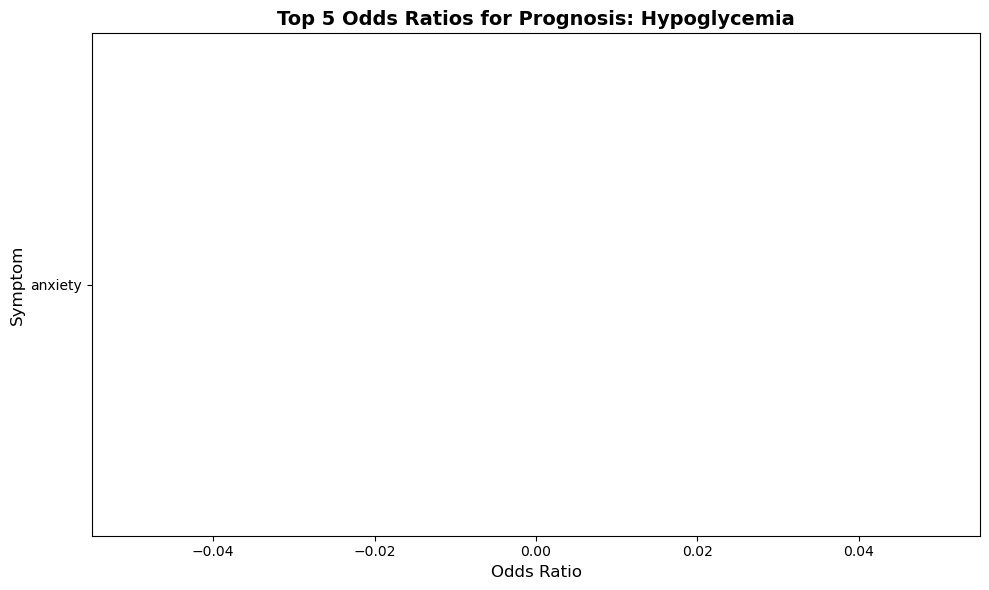

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Osteoarthristis
{'knee_pain': inf, 'hip_joint_pain': inf, 'neck_pain': 781.0, 'swelling_joints': 781.0, 'painful_walking': 781.0}
----------------------------------------------------------------------------------------------------


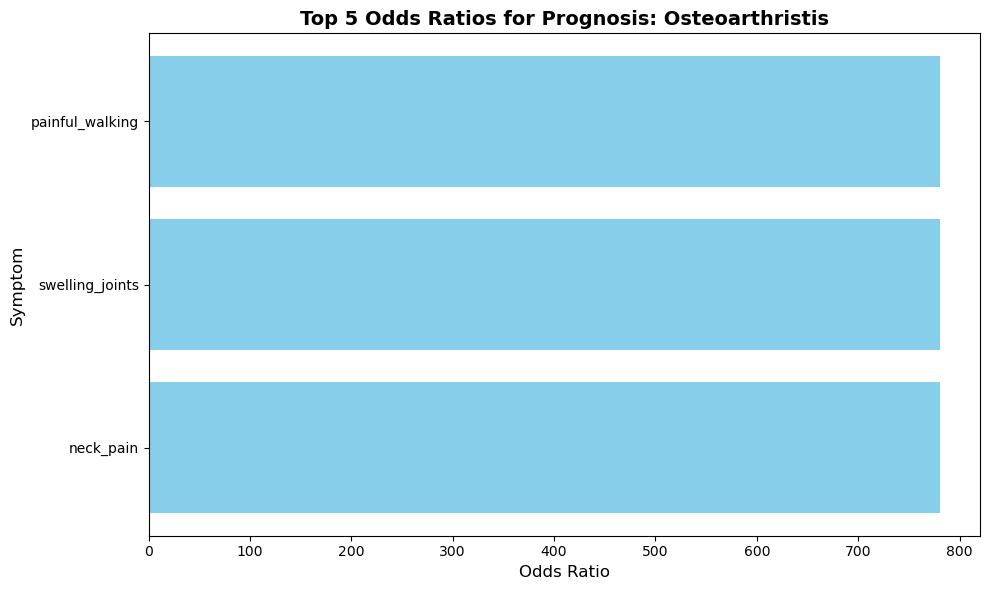

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Arthritis
{'movement_stiffness': inf, 'stiff_neck': 781.0, 'swelling_joints': 781.0, 'painful_walking': 781.0, 'muscle_weakness': 741.0}
----------------------------------------------------------------------------------------------------


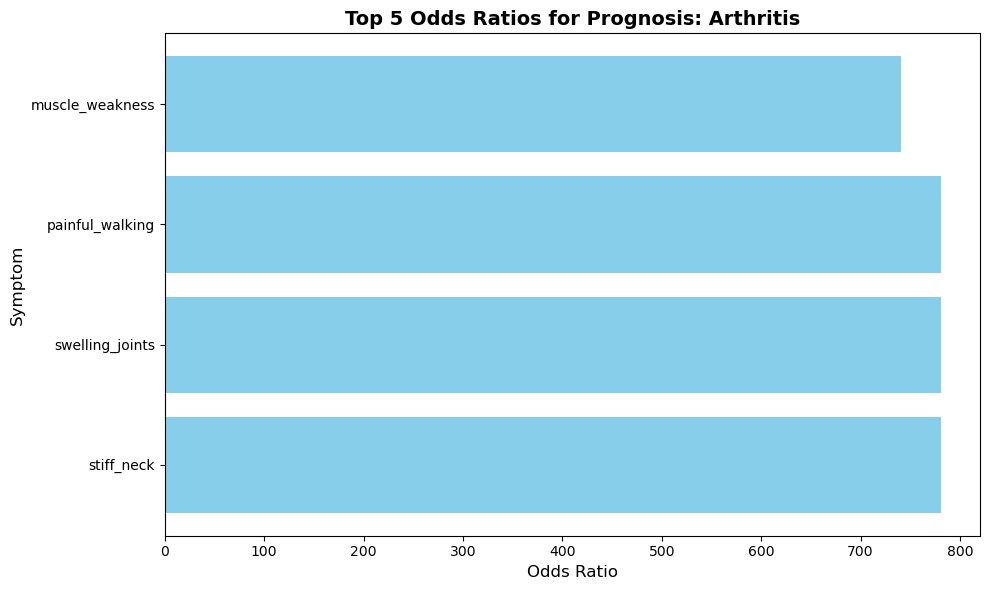

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: (vertigo) Paroymsal  Positional Vertigo
{'spinning_movements': inf, 'unsteadiness': inf, 'loss_of_balance': 381.0, 'headache': 70.41176470588236, 'nausea': 69.37209302325581}
----------------------------------------------------------------------------------------------------


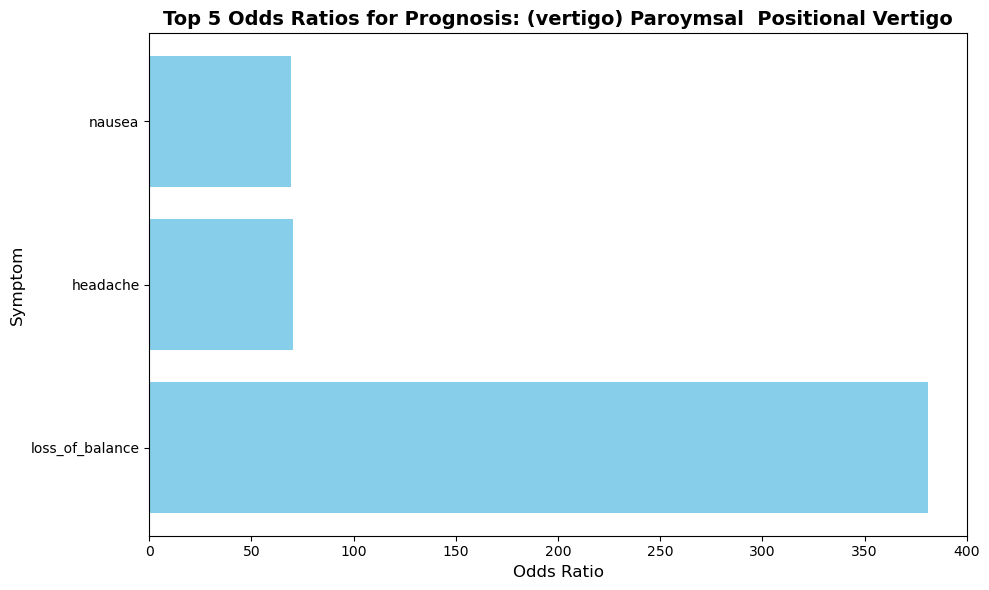

Prognosis: Acne
{'pus_filled_pimples': inf, 'blackheads': inf, 'scurring': inf, 'skin_rash': 116.71428571428572, 'itching': 0.0}
----------------------------------------------------------------------------------------------------


C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


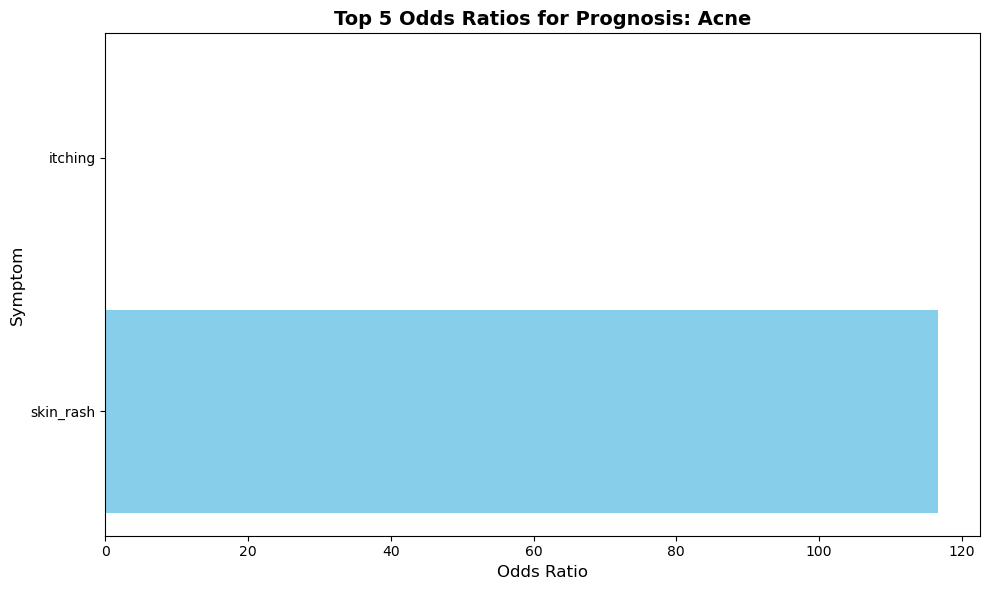

C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


Prognosis: Urinary tract infection
{'bladder_discomfort': inf, 'foul_smell_of urine': inf, 'continuous_feel_of_urine': inf, 'burning_micturition': 390.99999999999994, 'itching': 0.0}
----------------------------------------------------------------------------------------------------


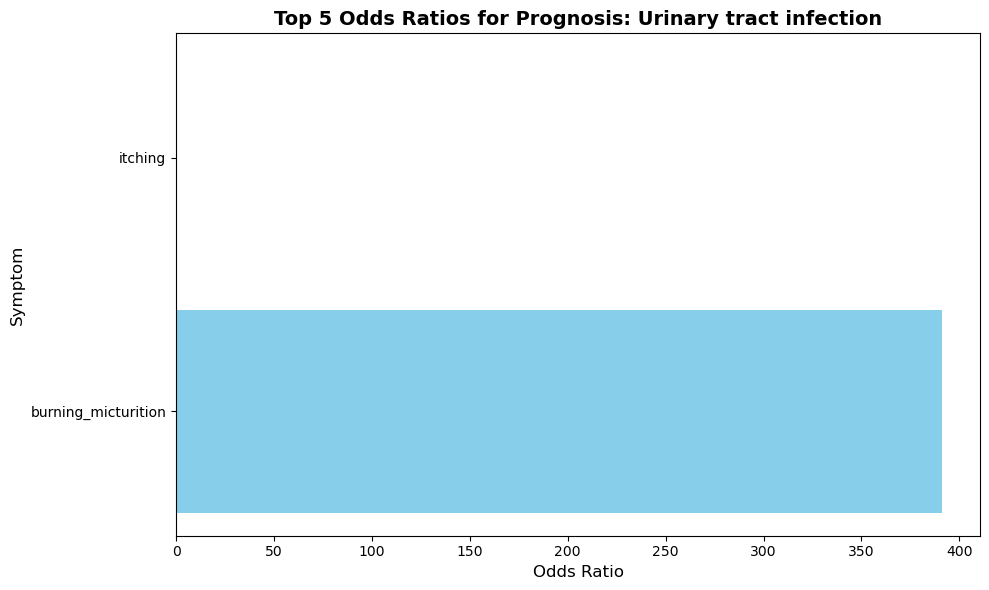

Prognosis: Psoriasis
{'skin_peeling': inf, 'silver_like_dusting': inf, 'small_dents_in_nails': inf, 'inflammatory_nails': inf, 'joint_pain': 141.0}
----------------------------------------------------------------------------------------------------


C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


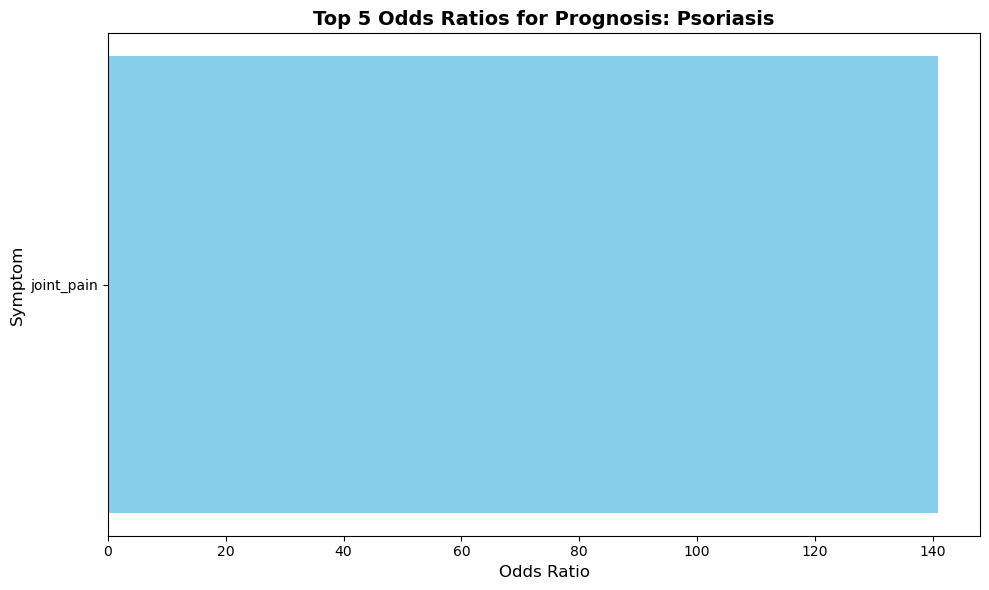

Prognosis: Impetigo
{'blister': inf, 'red_sore_around_nose': inf, 'yellow_crust_ooze': inf, 'skin_rash': 116.71428571428572, 'high_fever': 15.920634920634923}
----------------------------------------------------------------------------------------------------


C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
C:\Users\TIAGOFOA\AppData\Local\Temp\ipykernel_22012\753469606.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)


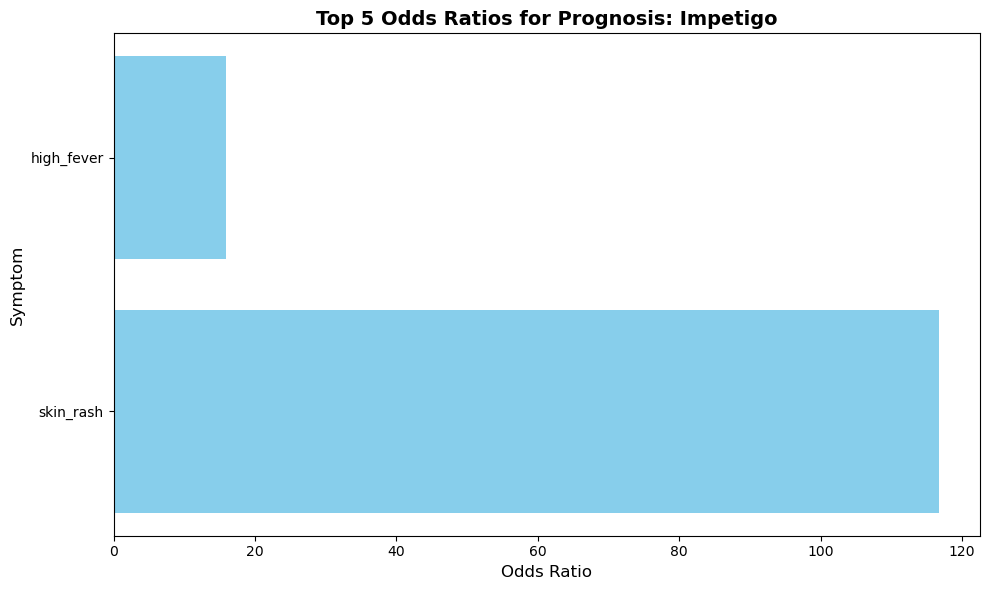

In [6]:
# Function to calculate odds ratio
def calculate_odds_ratio(contingency_table):
    if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
        return None  # Not enough data to calculate odds ratio

    a = contingency_table.iloc[1, 1]  # Symptom present & prognosis present
    b = contingency_table.iloc[1, 0]  # Symptom present & prognosis absent
    c = contingency_table.iloc[0, 1]  # Symptom absent & prognosis present
    d = contingency_table.iloc[0, 0]  # Symptom absent & prognosis absent

    # Check for zero counts to avoid division by zero
    if b == 0 or d == 0:
        return float('inf')  # Return infinity if there's a division by zero

    odds_ratio = (a / b) / (c / d)
    return odds_ratio


# Get unique prognosis classes from the 'prognosis' column
prognosis_classes = disease_training['prognosis'].unique()

# Initialize a dictionary to store odds ratios for plotting
odds_ratios_dict = {}

# Loop over each prognosis class and treat it as a binary target
for prognosis in prognosis_classes:
    # Convert prognosis to binary (1 if it's the current prognosis, 0 otherwise)
    disease_training['binary_prognosis'] = (disease_training['prognosis'] == prognosis).astype(int)

    # Initialize a dictionary to hold counts
    counts = {}

    for symptom in disease_training.columns:
        if symptom != 'prognosis' and symptom != 'binary_prognosis':
            # Create a contingency table
            table = pd.crosstab(disease_training[symptom], disease_training['binary_prognosis'])
            
            # Calculate odds ratio
            if len(table) == 2 and table.shape[1] == 2:
                odds_ratio = (table[1][1] / table[0][1]) / (table[1][0] / table[0][0])  # OR = (a/b) / (c/d)
                counts[symptom] = odds_ratio

    # Sort the odds ratios and select the top 5 symptoms
    sorted_odds = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True)[:5])
    
    # Store the top 5 odds ratios for the current prognosis in the dictionary
    odds_ratios_dict[prognosis] = sorted_odds
    
    # Print the prognosis name and its corresponding odds ratios
    print(f"Prognosis: {prognosis}")
    print(sorted_odds)
    print("-" * 100)
    
    # Plotting top 5 odds ratios for each prognosis
    symptoms = list(sorted_odds.keys())
    odds_values = list(sorted_odds.values())
    
    # Create a new figure for each prognosis
    plt.figure(figsize=(10, 6))
    
    # Plot the bar chart
    plt.barh(symptoms, odds_values, color='skyblue')
    
    # Add labels and title
    plt.xlabel("Odds Ratio", fontsize=12)
    plt.ylabel("Symptom", fontsize=12)
    plt.title(f"Top 5 Odds Ratios for Prognosis: {prognosis}", fontsize=14, weight='bold')
    
    # Show the plot
    plt.tight_layout()
    plt.show()


Prognosis: Fungal infection
{'nodal_skin_eruptions': 0.5012468827930174, 'dischromic _patches': 0.5012468827930174, 'itching': 0.08106044485611645, 'skin_rash': 0.07015366888620525, 'fluid_overload': 0.024390243902439025}
----------------------------------------------------------------------------------------------------


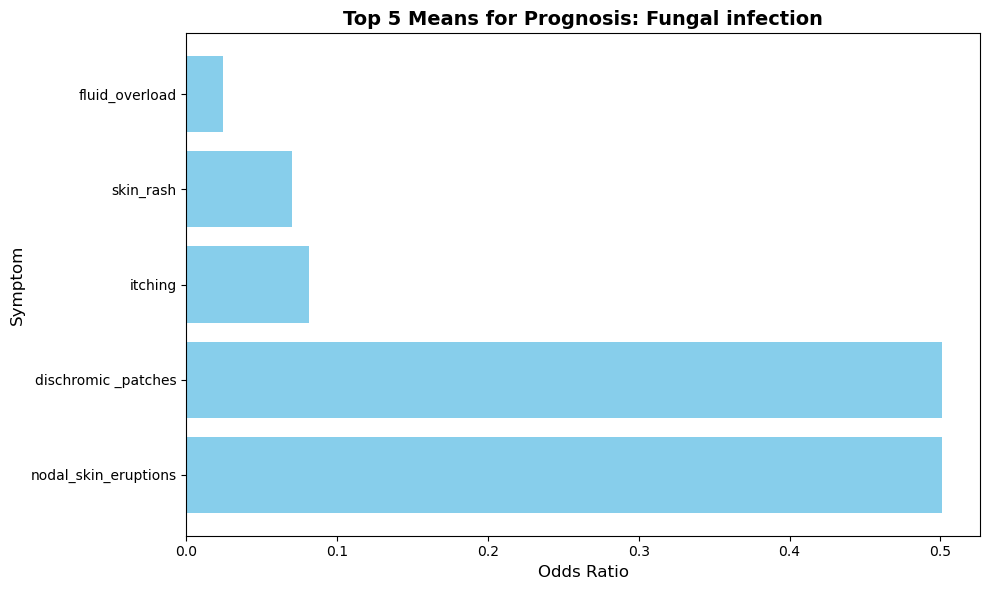

Prognosis: Allergy
{'shivering': 0.5012468827930174, 'watering_from_eyes': 0.5012468827930174, 'continuous_sneezing': 0.24452038245141694, 'chills': 0.06912477700802223, 'fluid_overload': 0.024390243902439025}
----------------------------------------------------------------------------------------------------


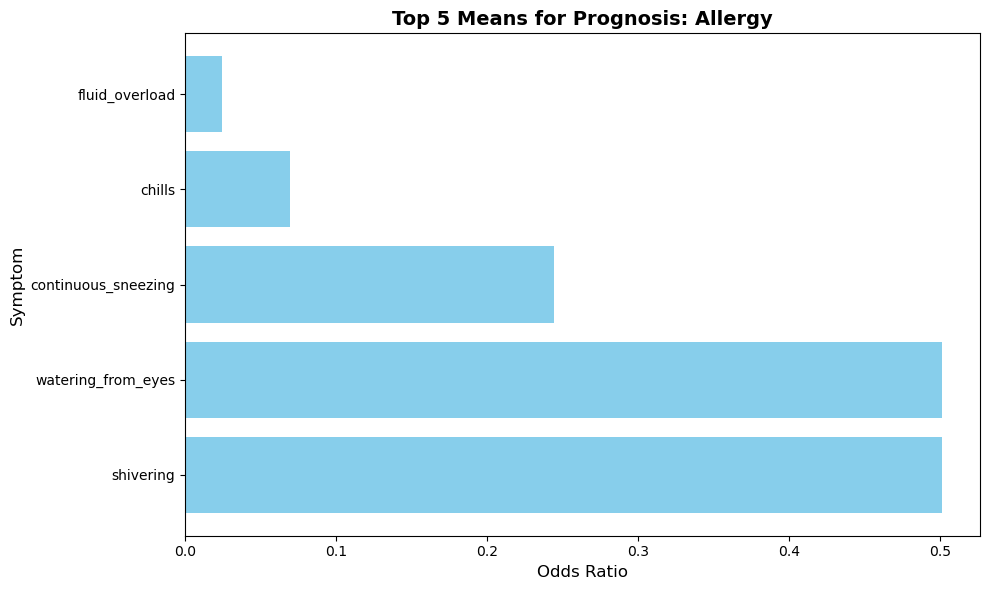

Prognosis: GERD
{'ulcers_on_tongue': 0.5012468827930174, 'stomach_pain': 0.2573953263608436, 'acidity': 0.24452038245141694, 'cough': 0.10175253502139381, 'chest_pain': 0.08260677899686521}
----------------------------------------------------------------------------------------------------


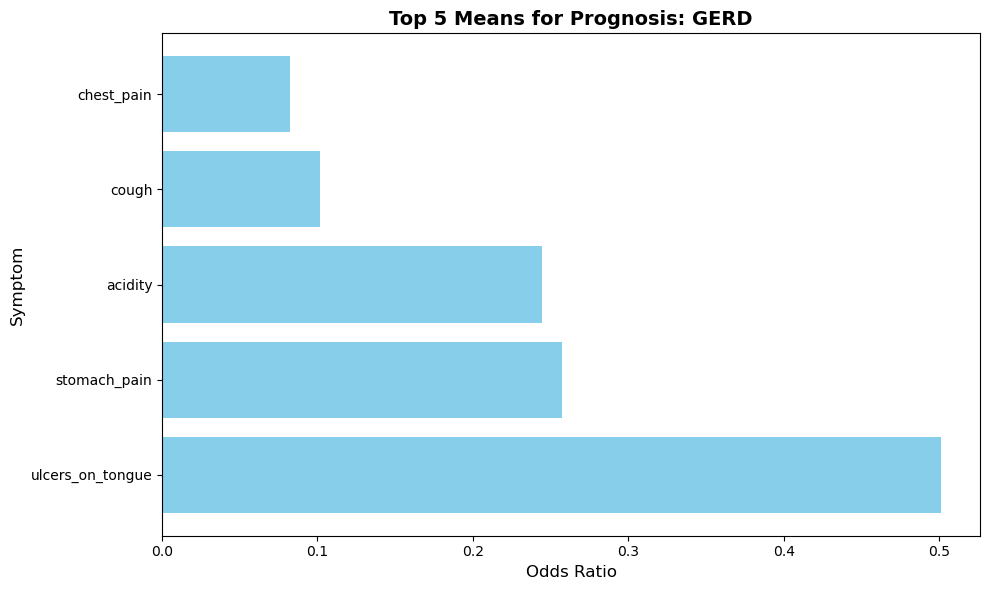

Prognosis: Chronic cholestasis
{'itching': 0.0847780100386777, 'yellowing_of_eyes': 0.07058393532851737, 'yellowish_skin': 0.06324850299401198, 'abdominal_pain': 0.05600416307780649, 'nausea': 0.0505331324549064}
----------------------------------------------------------------------------------------------------


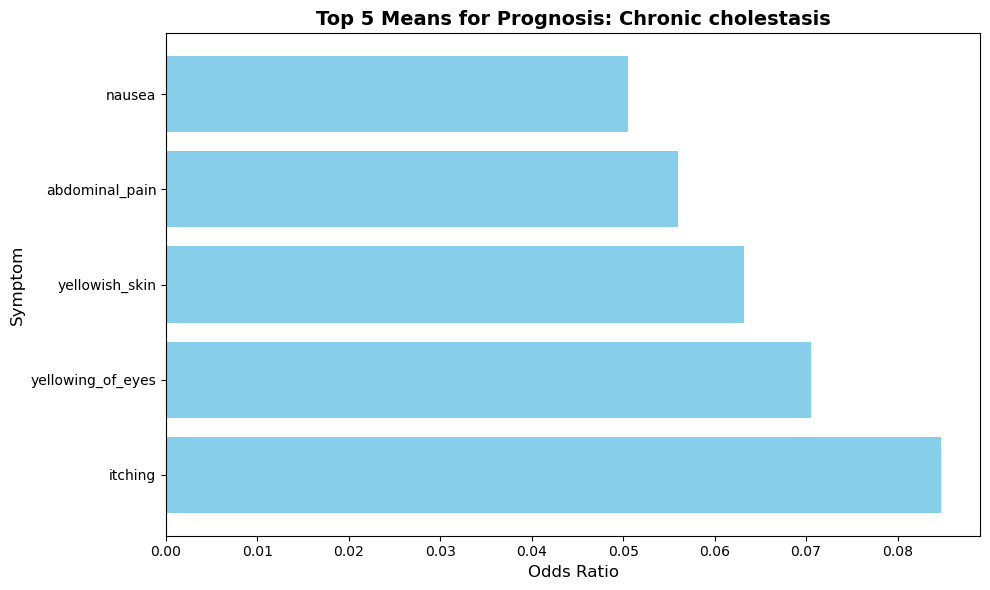

Prognosis: Drug Reaction
{'spotting_ urination': 0.5012468827930174, 'burning_micturition': 0.2512755102040816, 'stomach_pain': 0.24452038245141694, 'itching': 0.0847780100386777, 'skin_rash': 0.07015366888620525}
----------------------------------------------------------------------------------------------------


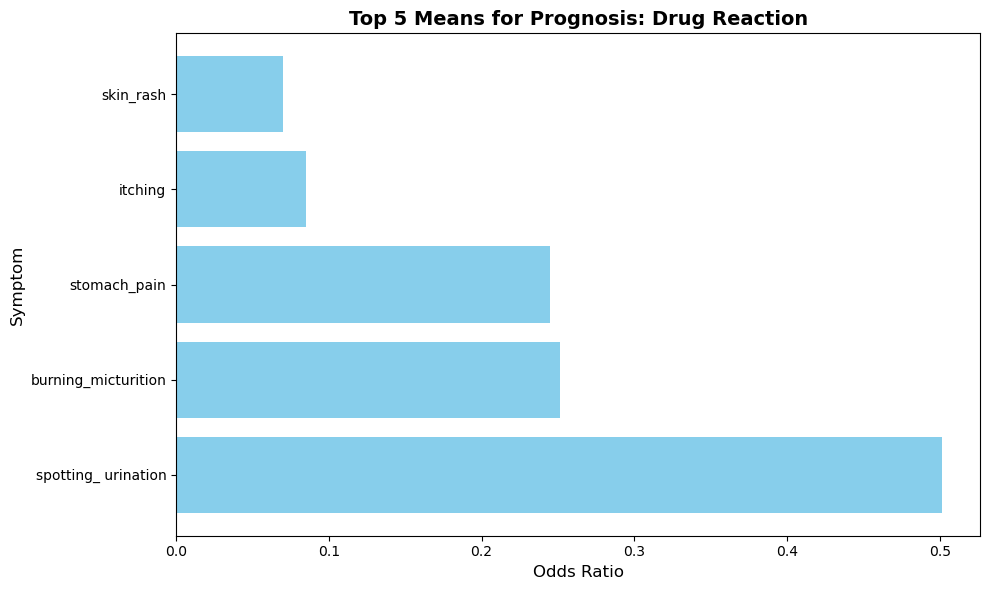

Prognosis: Peptic ulcer diseae
{'passage_of_gases': 0.5006242197253433, 'internal_itching': 0.5006242197253433, 'indigestion': 0.24452038245141694, 'abdominal_pain': 0.05600416307780649, 'loss_of_appetite': 0.04846735668789809}
----------------------------------------------------------------------------------------------------


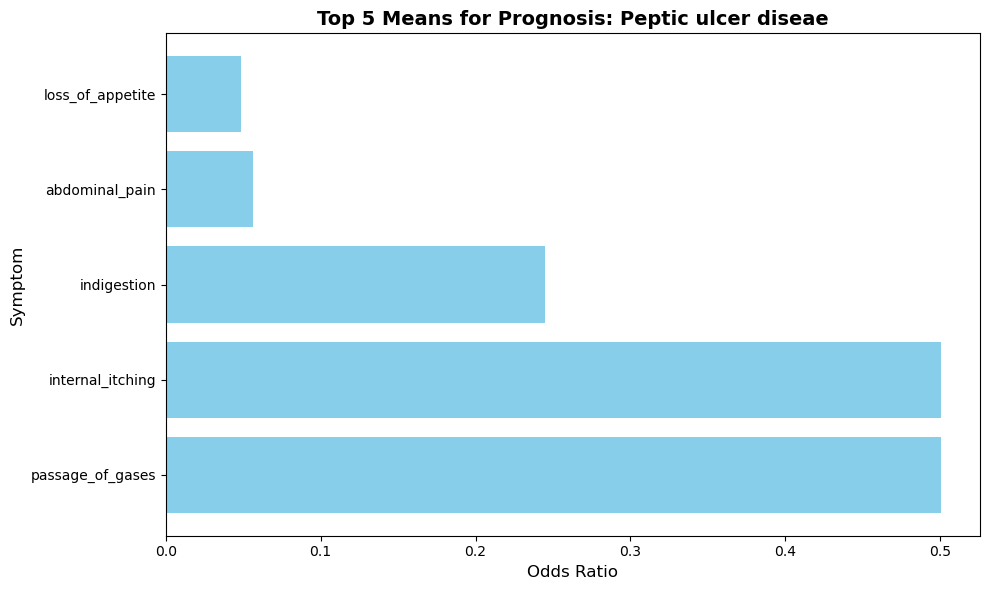

Prognosis: AIDS
{'muscle_wasting': 0.5012468827930174, 'patches_in_throat': 0.5012468827930174, 'extra_marital_contacts': 0.5012468827930174, 'high_fever': 0.0426933905847219, 'fluid_overload': 0.024390243902439025}
----------------------------------------------------------------------------------------------------


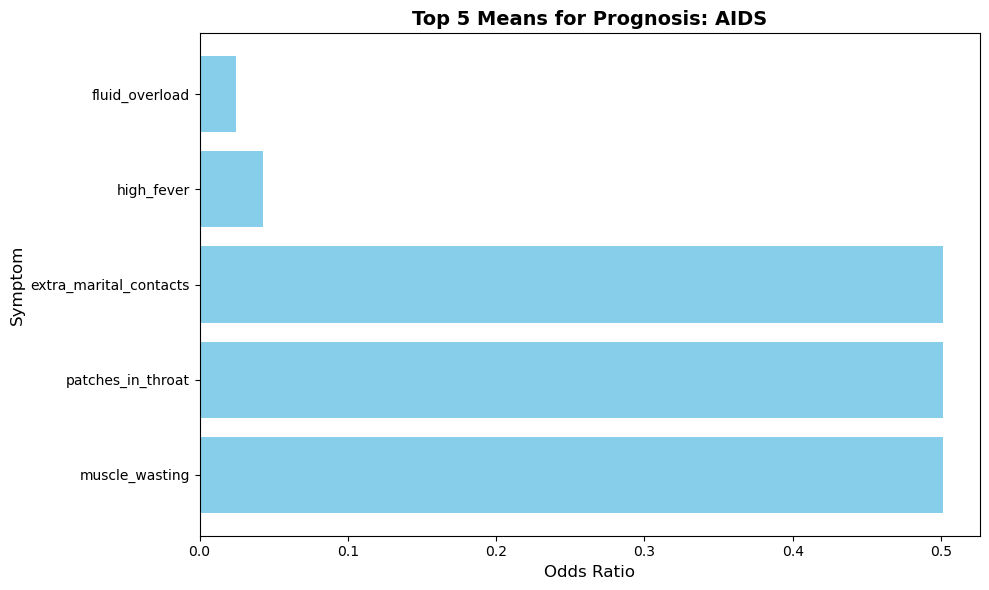

Prognosis: Diabetes 
{'irregular_sugar_level': 0.5006242197253433, 'increased_appetite': 0.5, 'polyuria': 0.5, 'restlessness': 0.2506393861892583, 'obesity': 0.2506393861892583}
----------------------------------------------------------------------------------------------------


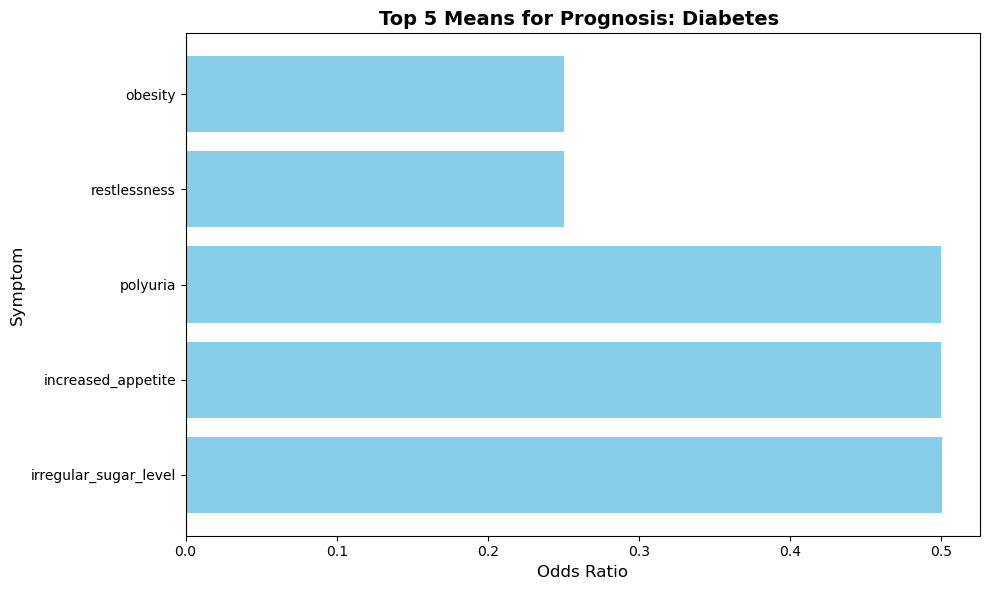

Prognosis: Gastroenteritis
{'sunken_eyes': 0.5012468827930174, 'dehydration': 0.5012468827930174, 'diarrhoea': 0.10175253502139381, 'vomiting': 0.030209174128232565, 'fluid_overload': 0.024390243902439025}
----------------------------------------------------------------------------------------------------


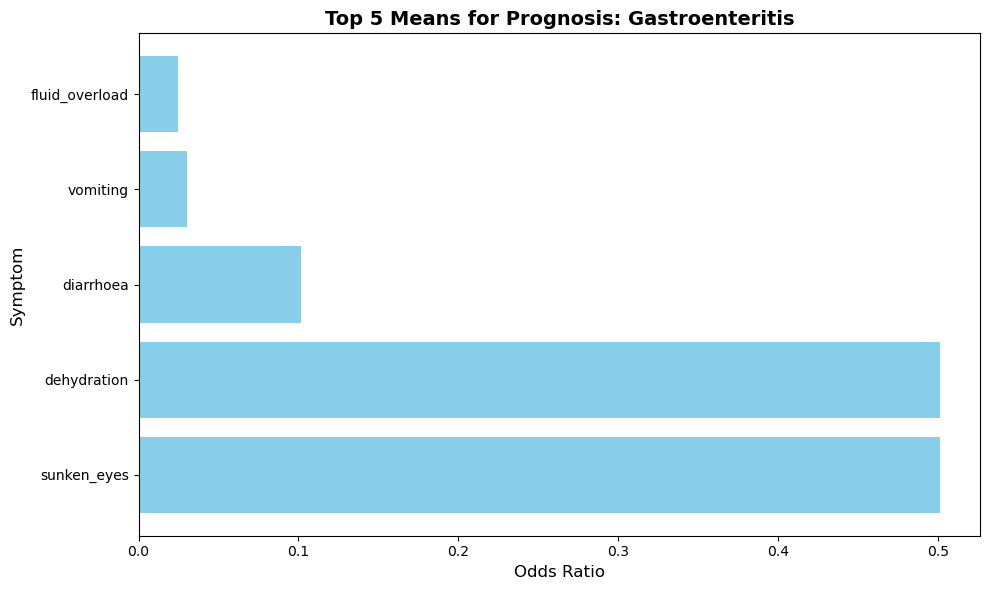

Prognosis: Bronchial Asthma
{'mucoid_sputum': 0.5006242197253433, 'family_history': 0.2506393861892583, 'breathlessness': 0.12733780760626398, 'cough': 0.09712209131938339, 'high_fever': 0.0426933905847219}
----------------------------------------------------------------------------------------------------


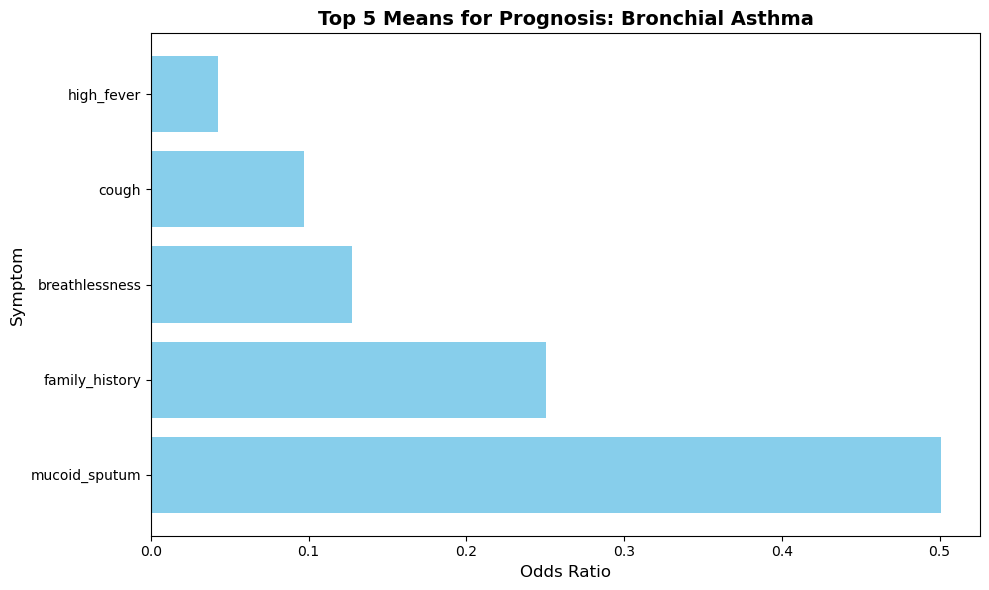

Prognosis: Hypertension 
{'lack_of_concentration': 0.5006242197253433, 'loss_of_balance': 0.1673219746614242, 'dizziness': 0.16202318623784592, 'chest_pain': 0.07900666144200627, 'headache': 0.04920383367293034}
----------------------------------------------------------------------------------------------------


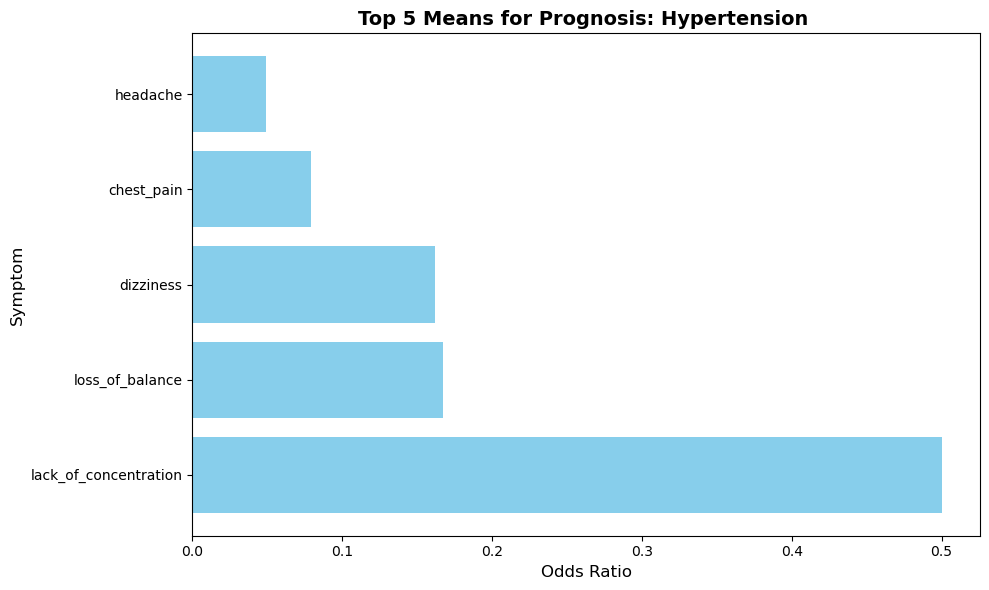

Prognosis: Migraine
{'visual_disturbances': 0.5006242197253433, 'acidity': 0.2573953263608436, 'indigestion': 0.2573953263608436, 'stiff_neck': 0.2506393861892583, 'depression': 0.24422994845530055}
----------------------------------------------------------------------------------------------------


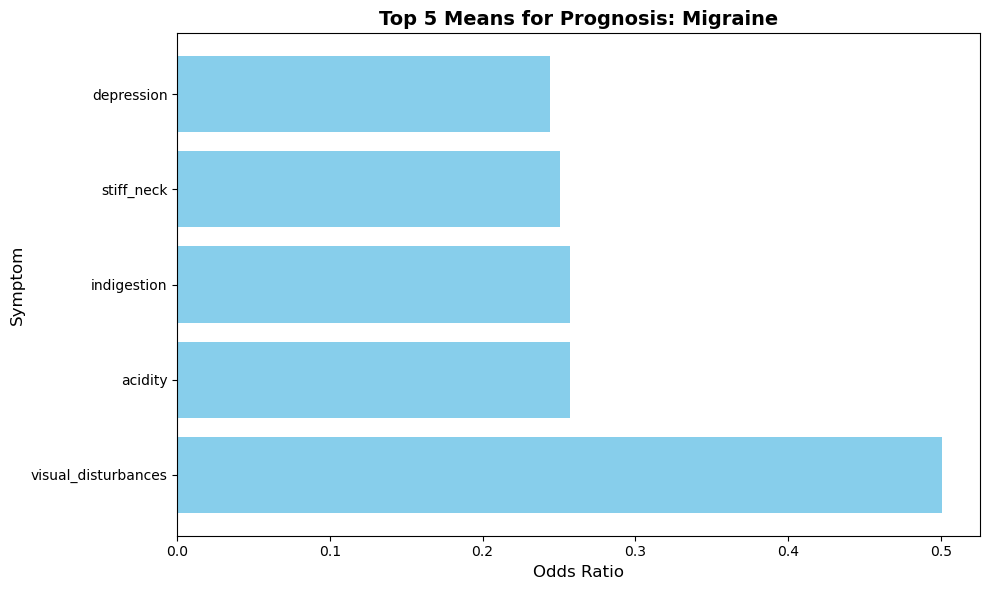

Prognosis: Cervical spondylosis
{'weakness_in_limbs': 0.5012468827930174, 'neck_pain': 0.2506393861892583, 'back_pain': 0.2381208776416745, 'dizziness': 0.17029730740463725, 'loss_of_balance': 0.1673219746614242}
----------------------------------------------------------------------------------------------------


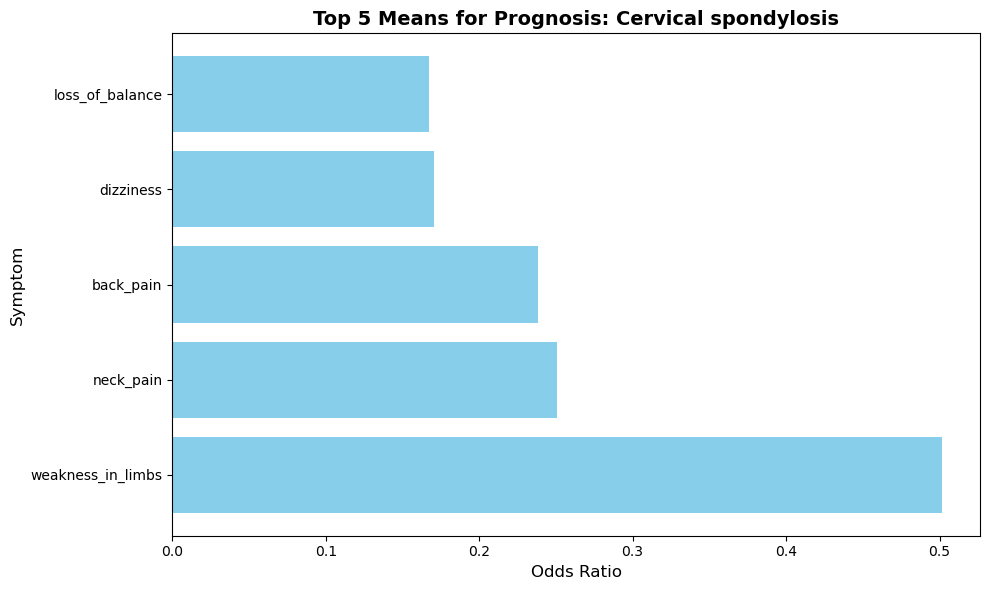

Prognosis: Paralysis (brain hemorrhage)
{'weakness_of_one_body_side': 0.5012468827930174, 'altered_sensorium': 0.5006242197253433, 'headache': 0.04920383367293034, 'vomiting': 0.030209174128232565, 'fluid_overload': 0.024390243902439025}
----------------------------------------------------------------------------------------------------


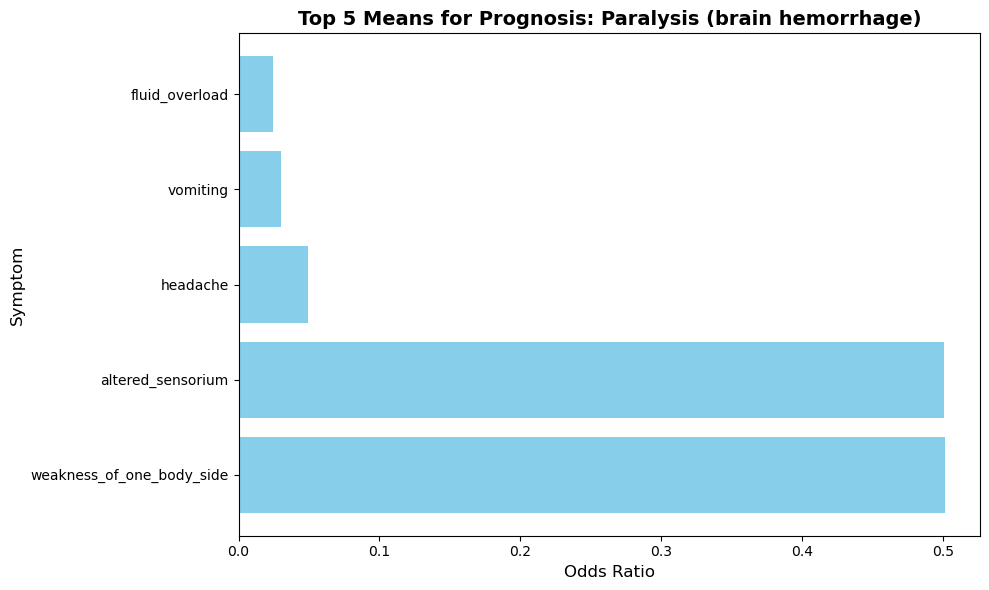

Prognosis: Jaundice
{'weight_loss': 0.1256720430107527, 'dark_urine': 0.1006896551724138, 'itching': 0.0847780100386777, 'yellowish_skin': 0.06324850299401198, 'abdominal_pain': 0.05600416307780649}
----------------------------------------------------------------------------------------------------


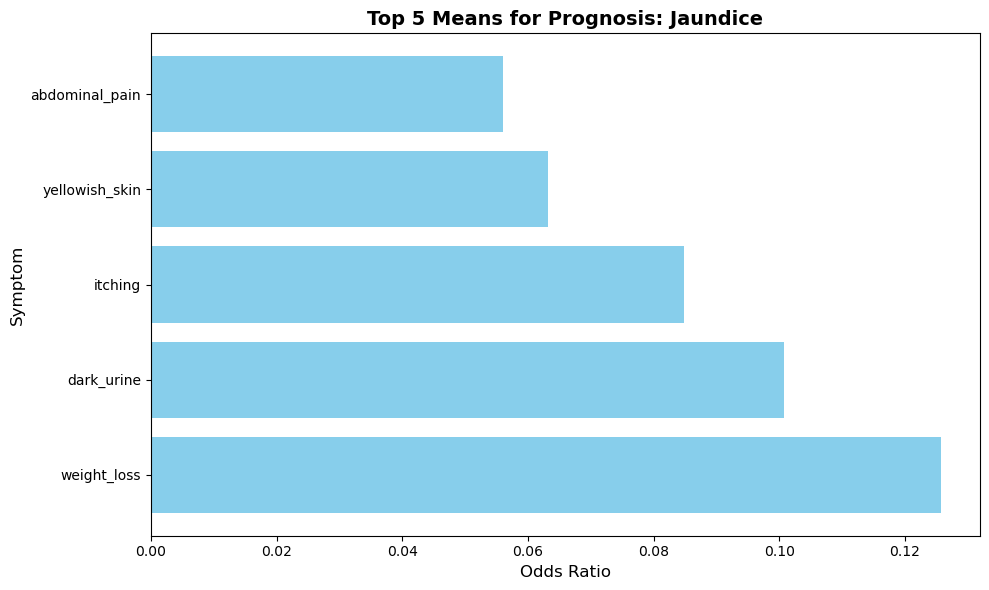

Prognosis: Malaria
{'muscle_pain': 0.12658227848101267, 'diarrhoea': 0.09712209131938339, 'sweating': 0.0847780100386777, 'chills': 0.07215637346641714, 'headache': 0.05105694329149162}
----------------------------------------------------------------------------------------------------


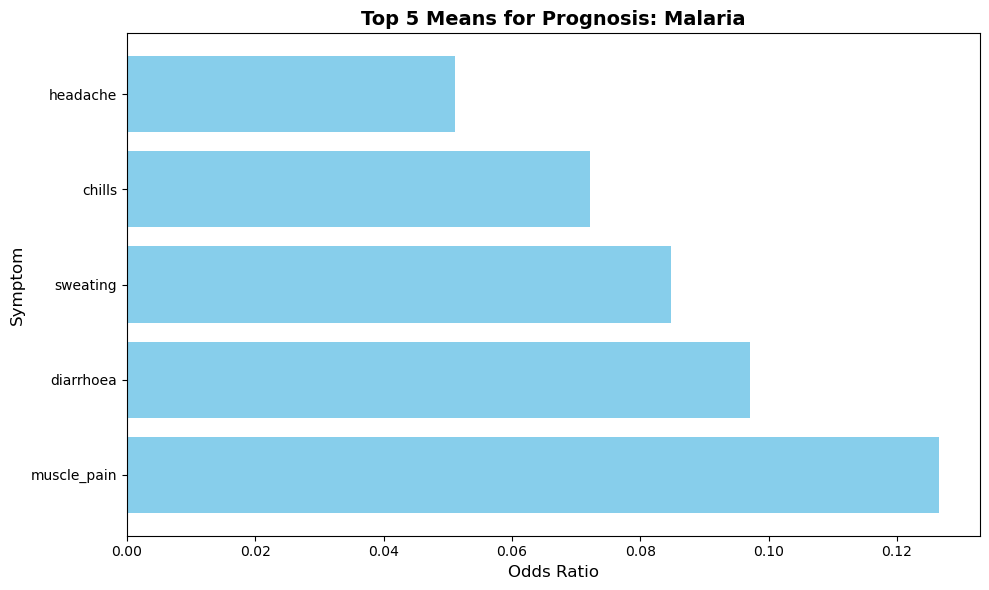

Prognosis: Chicken pox
{'red_spots_over_body': 0.2564102564102564, 'swelled_lymph_nodes': 0.16444927142727847, 'mild_fever': 0.16167397937593264, 'lethargy': 0.1256720430107527, 'malaise': 0.08547008547008547}
----------------------------------------------------------------------------------------------------


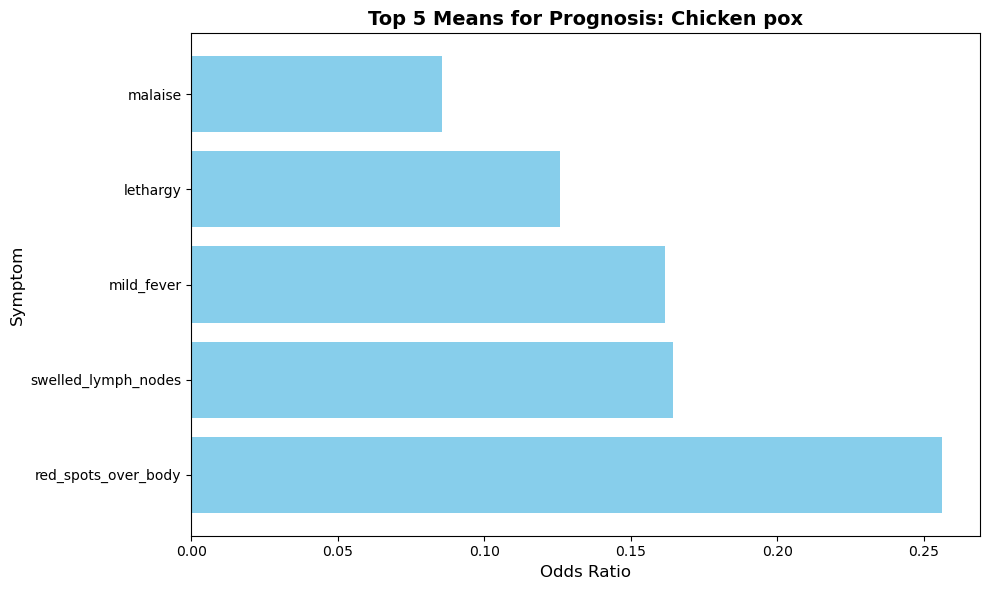

Prognosis: Dengue
{'pain_behind_the_eyes': 0.5, 'back_pain': 0.2631578947368421, 'red_spots_over_body': 0.24422994845530055, 'muscle_pain': 0.1209279283896206, 'joint_pain': 0.08404154863078375}
----------------------------------------------------------------------------------------------------


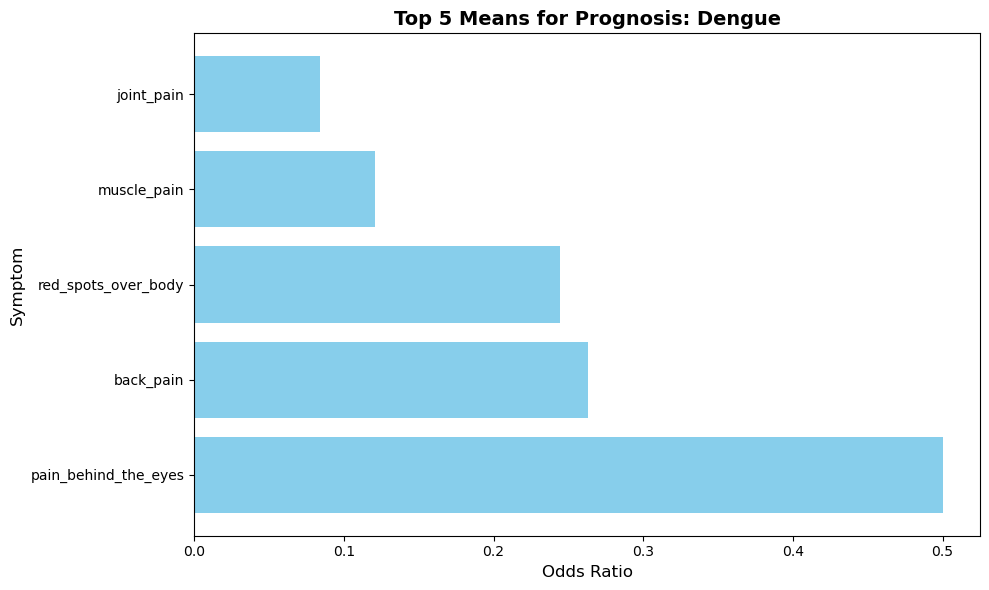

Prognosis: Typhoid
{'toxic_look_(typhos)': 0.5006242197253433, 'belly_pain': 0.5006242197253433, 'constipation': 0.2506393861892583, 'diarrhoea': 0.10175253502139381, 'chills': 0.07518796992481203}
----------------------------------------------------------------------------------------------------


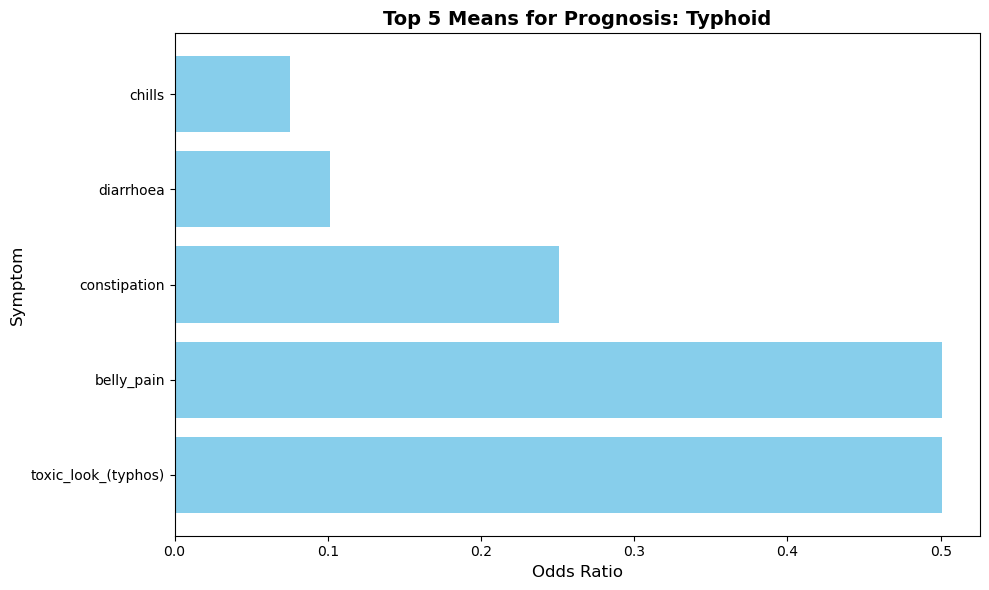

Prognosis: hepatitis A
{'mild_fever': 0.1694915254237288, 'muscle_pain': 0.12658227848101267, 'diarrhoea': 0.10175253502139381, 'dark_urine': 0.1006896551724138, 'joint_pain': 0.08404154863078375}
----------------------------------------------------------------------------------------------------


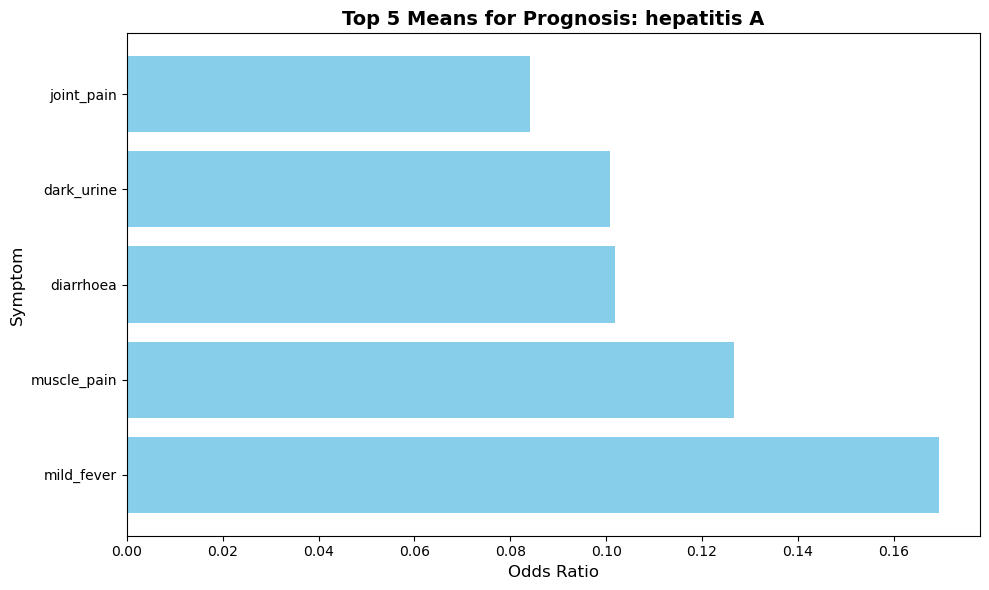

Prognosis: Hepatitis B
{'yellow_urine': 0.5006242197253433, 'receiving_blood_transfusion': 0.5, 'receiving_unsterile_injections': 0.5, 'lethargy': 0.1256720430107527, 'dark_urine': 0.1006896551724138}
----------------------------------------------------------------------------------------------------


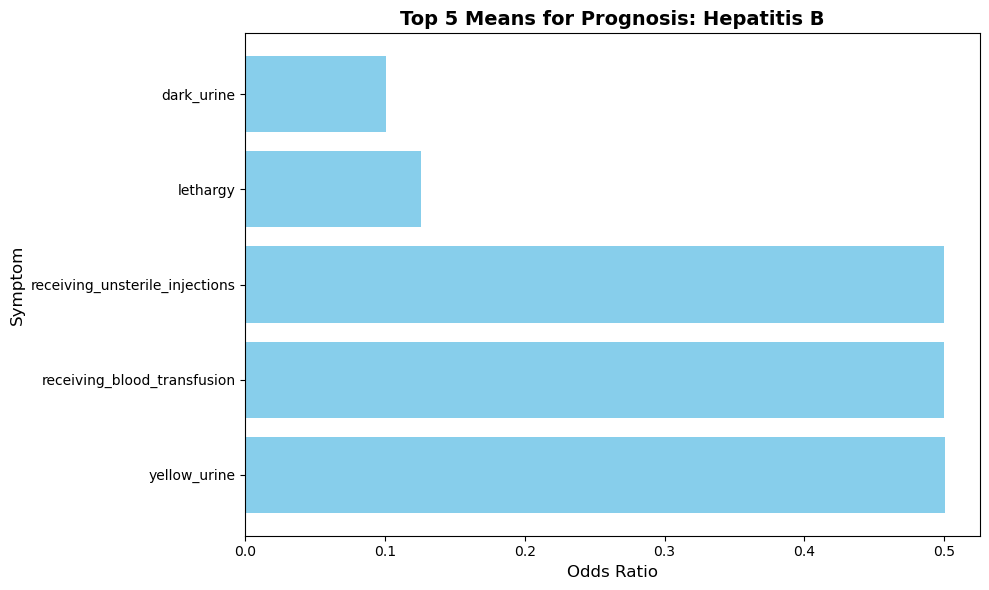

Prognosis: Hepatitis C
{'family_history': 0.2506393861892583, 'yellowing_of_eyes': 0.06763845889232886, 'yellowish_skin': 0.06324850299401198, 'nausea': 0.0505331324549064, 'loss_of_appetite': 0.05027534501061571}
----------------------------------------------------------------------------------------------------


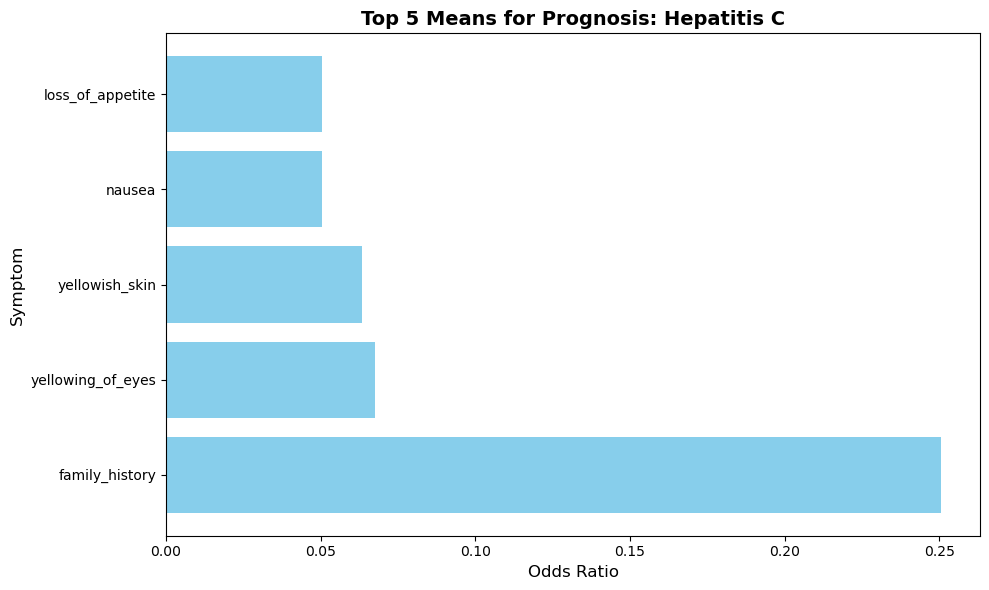

Prognosis: Hepatitis D
{'dark_urine': 0.1006896551724138, 'joint_pain': 0.08404154863078375, 'yellowing_of_eyes': 0.07058393532851737, 'yellowish_skin': 0.06324850299401198, 'abdominal_pain': 0.05600416307780649}
----------------------------------------------------------------------------------------------------


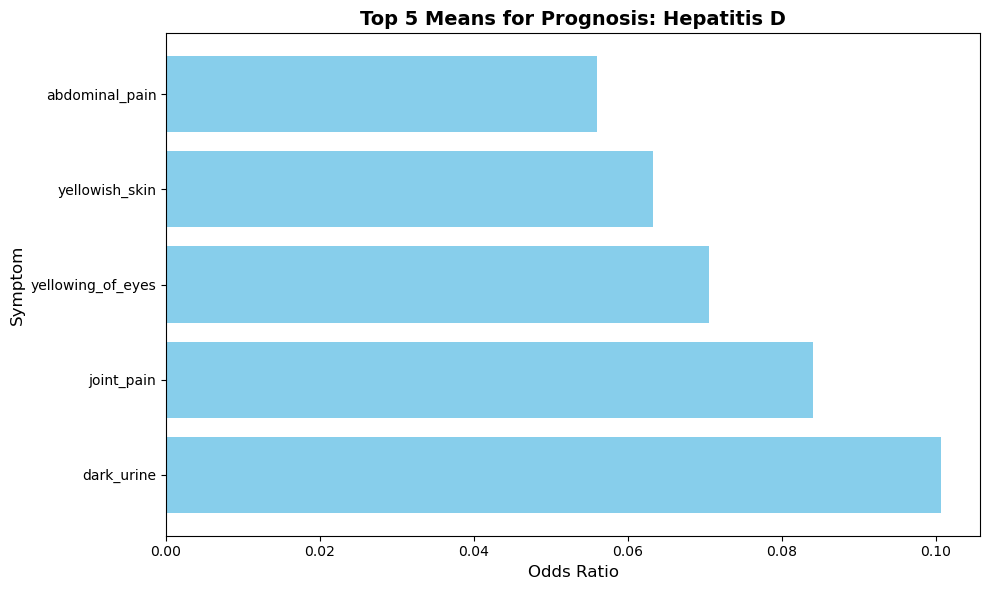

Prognosis: Hepatitis E
{'acute_liver_failure': 0.5006242197253433, 'coma': 0.5, 'stomach_bleeding': 0.5, 'dark_urine': 0.1006896551724138, 'joint_pain': 0.08404154863078375}
----------------------------------------------------------------------------------------------------


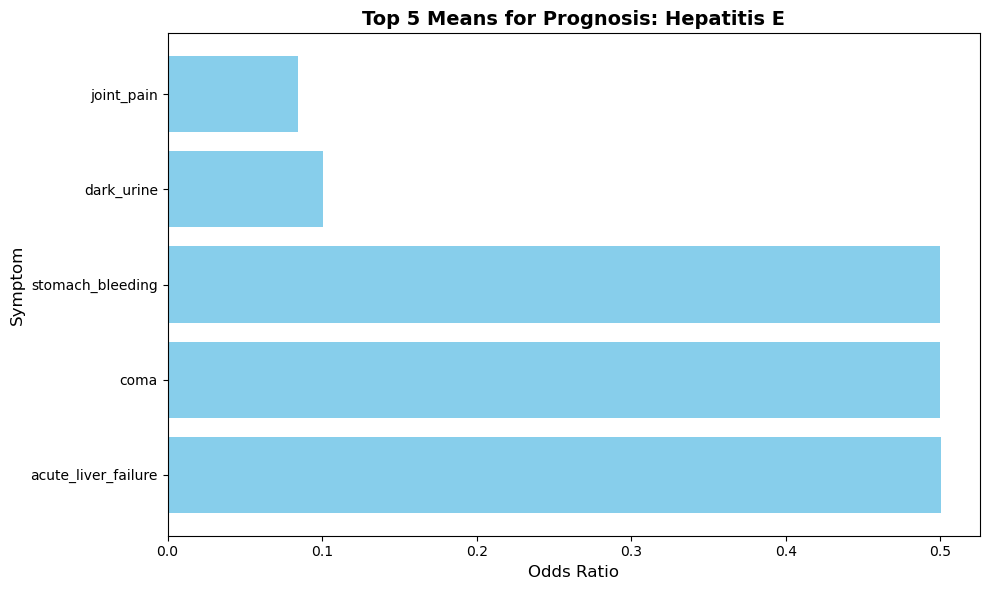

Prognosis: Alcoholic hepatitis
{'swelling_of_stomach': 0.5006242197253433, 'distention_of_abdomen': 0.5006242197253433, 'history_of_alcohol_consumption': 0.5006242197253433, 'fluid_overload.1': 0.5006242197253433, 'yellowish_skin': 0.06324850299401198}
----------------------------------------------------------------------------------------------------


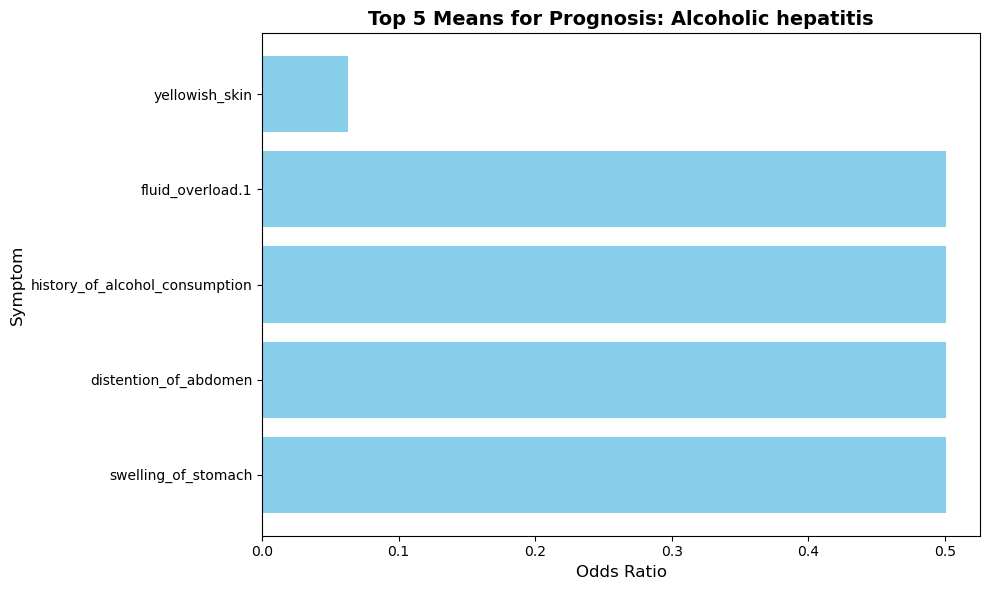

Prognosis: Tuberculosis
{'blood_in_sputum': 0.5, 'swelled_lymph_nodes': 0.1724137931034483, 'mild_fever': 0.1694915254237288, 'phlegm': 0.1694915254237288, 'breathlessness': 0.12733780760626398}
----------------------------------------------------------------------------------------------------


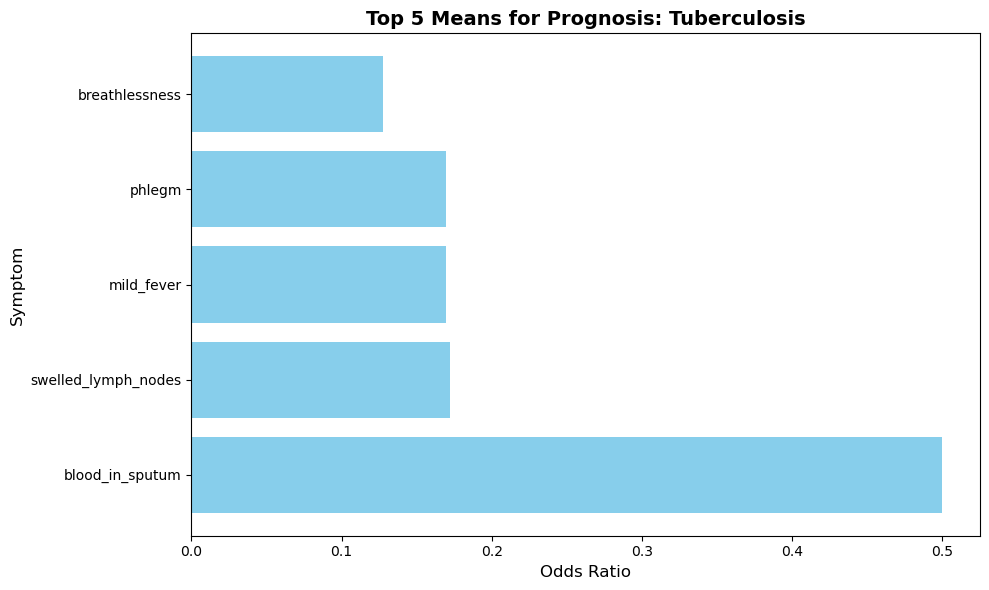

Prognosis: Common Cold
{'throat_irritation': 0.5, 'redness_of_eyes': 0.5, 'sinus_pressure': 0.5, 'runny_nose': 0.5, 'congestion': 0.5}
----------------------------------------------------------------------------------------------------


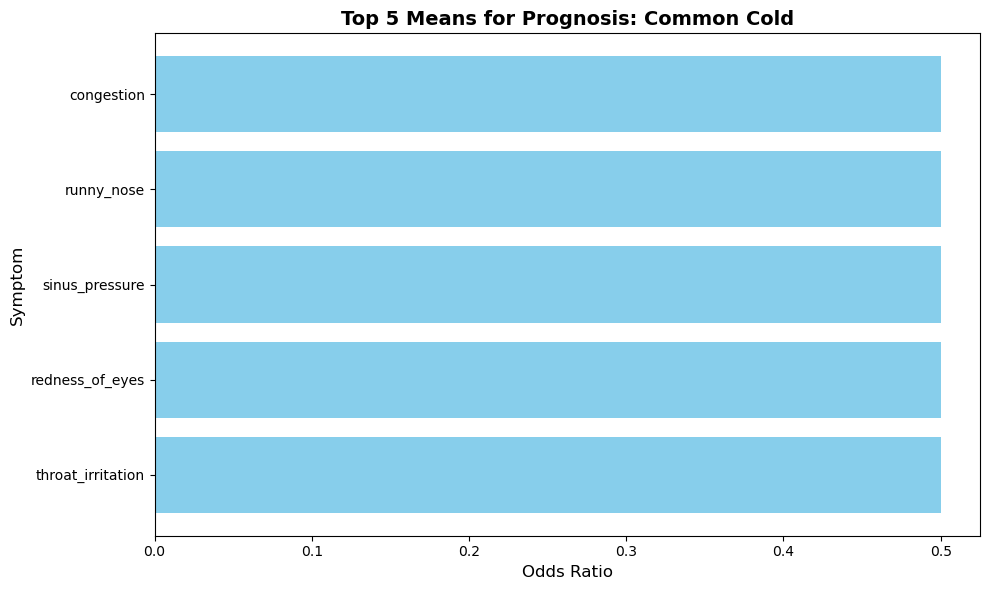

Prognosis: Pneumonia
{'rusty_sputum': 0.5, 'fast_heart_rate': 0.2564102564102564, 'phlegm': 0.16167397937593264, 'breathlessness': 0.12733780760626398, 'cough': 0.10175253502139381}
----------------------------------------------------------------------------------------------------


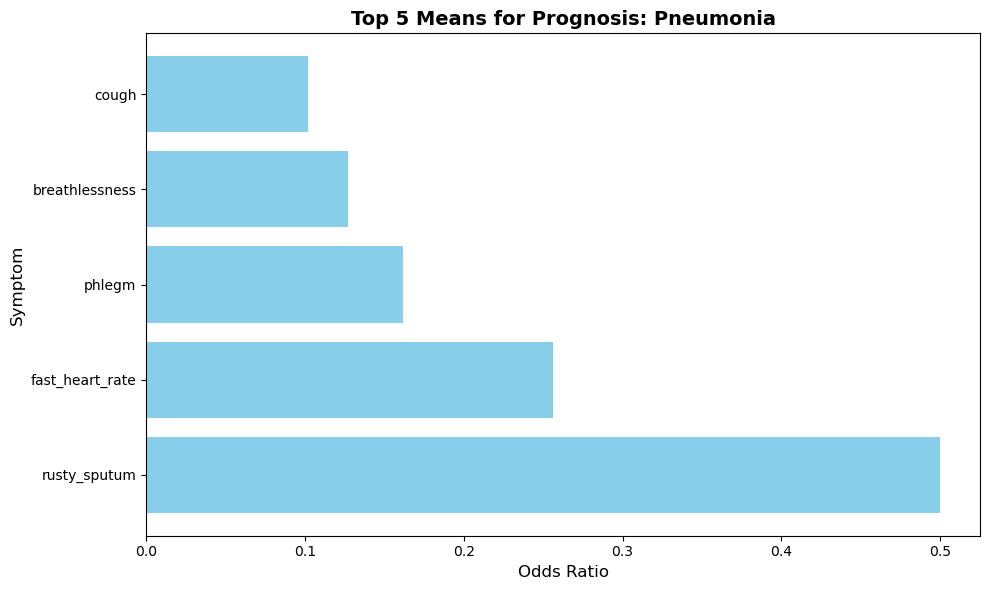

Prognosis: Dimorphic hemmorhoids(piles)
{'pain_during_bowel_movements': 0.5006242197253433, 'pain_in_anal_region': 0.5006242197253433, 'bloody_stool': 0.5006242197253433, 'irritation_in_anus': 0.5006242197253433, 'constipation': 0.2506393861892583}
----------------------------------------------------------------------------------------------------


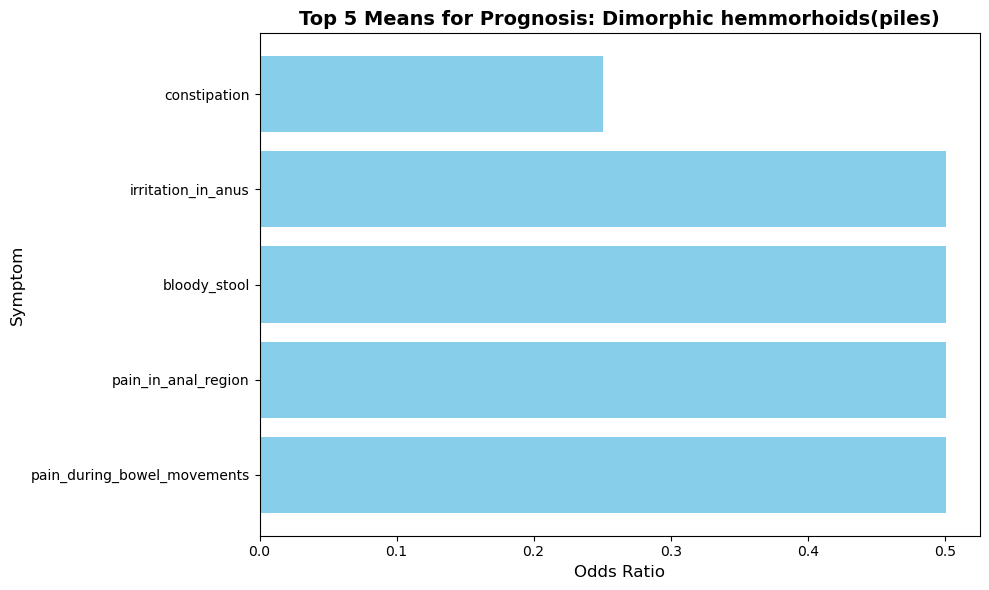

Prognosis: Heart attack
{'breathlessness': 0.12134228187919463, 'chest_pain': 0.08260677899686521, 'sweating': 0.08106044485611645, 'vomiting': 0.030209174128232565, 'fluid_overload': 0.024390243902439025}
----------------------------------------------------------------------------------------------------


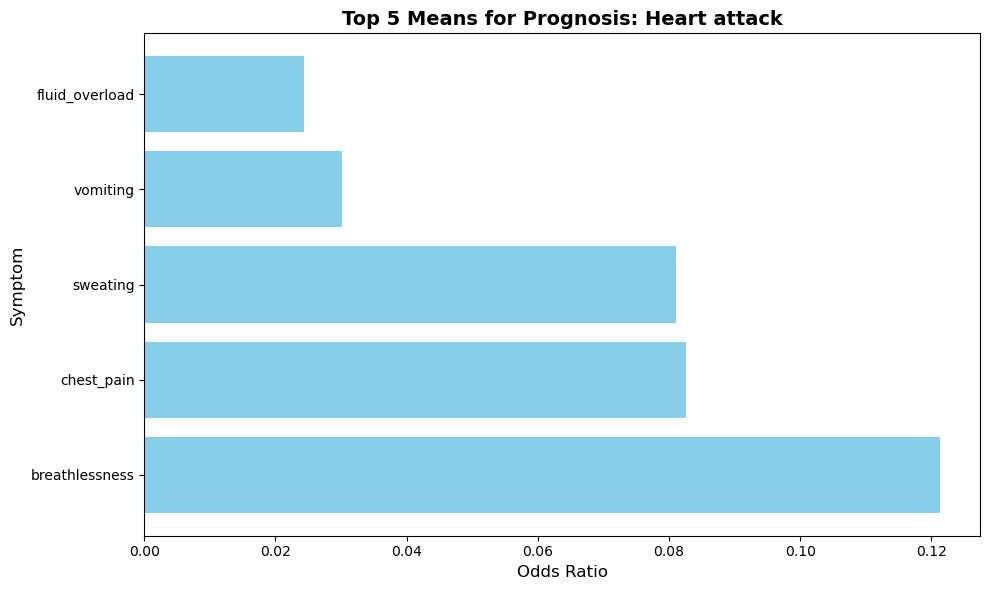

Prognosis: Varicose veins
{'swollen_blood_vessels': 0.5012468827930174, 'cramps': 0.5006242197253433, 'bruising': 0.5006242197253433, 'swollen_legs': 0.5006242197253433, 'prominent_veins_on_calf': 0.5006242197253433}
----------------------------------------------------------------------------------------------------


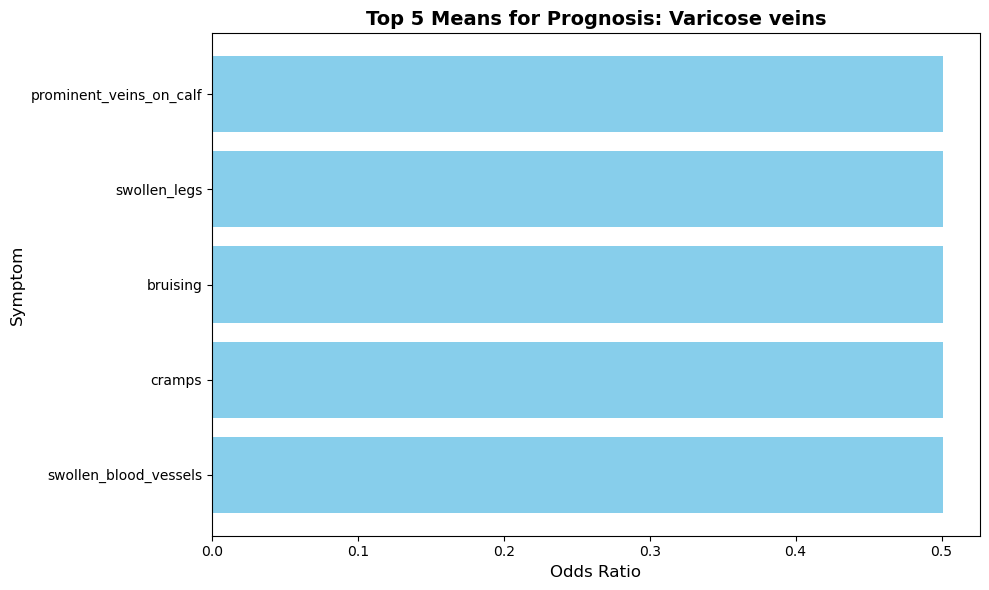

Prognosis: Hypothyroidism
{'weight_gain': 0.5006242197253433, 'cold_hands_and_feets': 0.5006242197253433, 'puffy_face_and_eyes': 0.5006242197253433, 'enlarged_thyroid': 0.5, 'brittle_nails': 0.5}
----------------------------------------------------------------------------------------------------


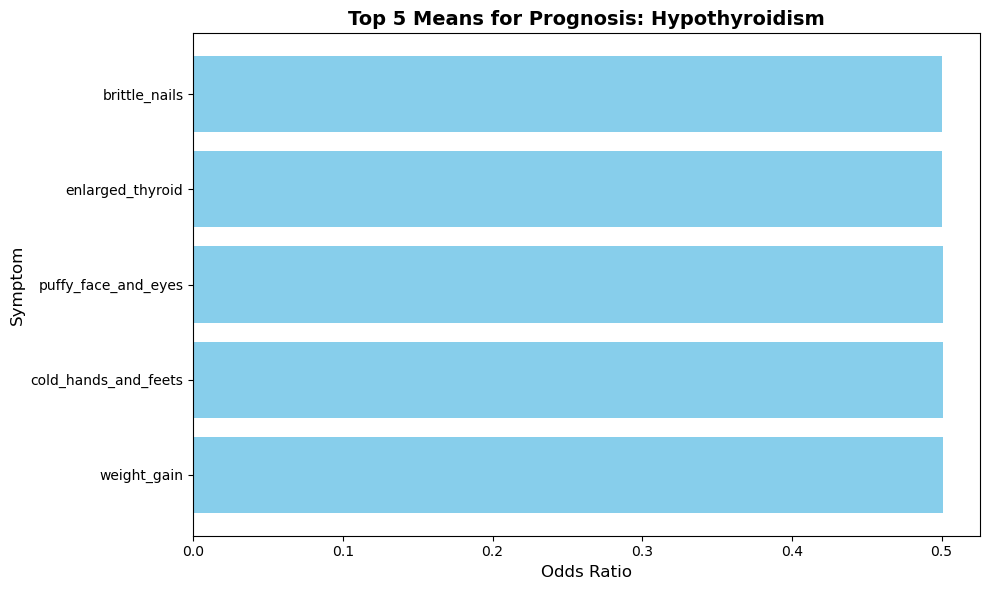

Prognosis: Hyperthyroidism
{'muscle_weakness': 0.2564102564102564, 'mood_swings': 0.2506393861892583, 'restlessness': 0.2506393861892583, 'abnormal_menstruation': 0.25, 'fast_heart_rate': 0.24422994845530055}
----------------------------------------------------------------------------------------------------


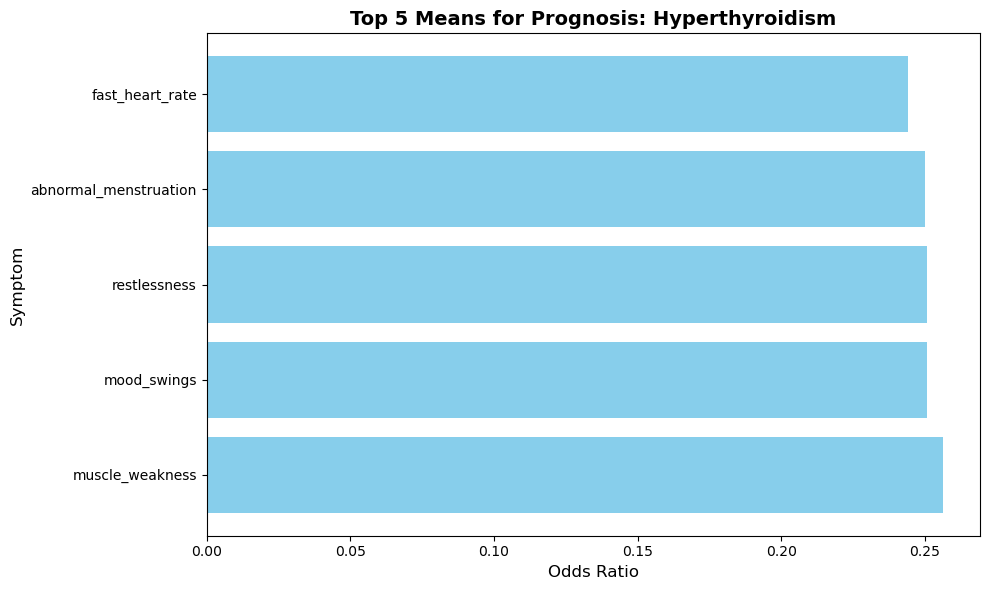

Prognosis: Hypoglycemia
{'anxiety': 0.5006242197253433, 'drying_and_tingling_lips': 0.5006242197253433, 'slurred_speech': 0.5, 'palpitations': 0.5, 'blurred_and_distorted_vision': 0.1673219746614242}
----------------------------------------------------------------------------------------------------


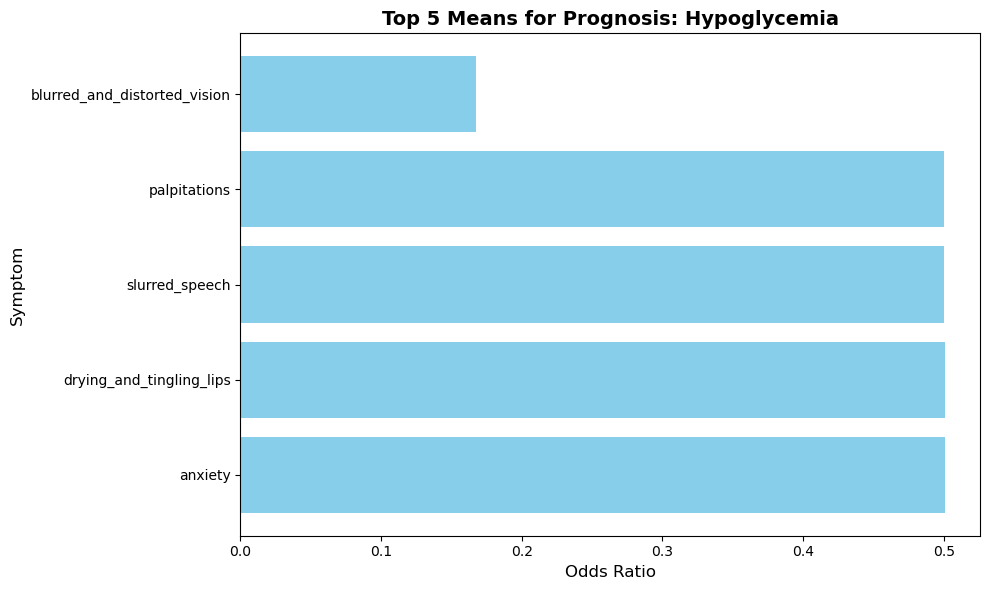

Prognosis: Osteoarthristis
{'knee_pain': 0.5006242197253433, 'hip_joint_pain': 0.5006242197253433, 'neck_pain': 0.2506393861892583, 'swelling_joints': 0.2506393861892583, 'painful_walking': 0.2506393861892583}
----------------------------------------------------------------------------------------------------


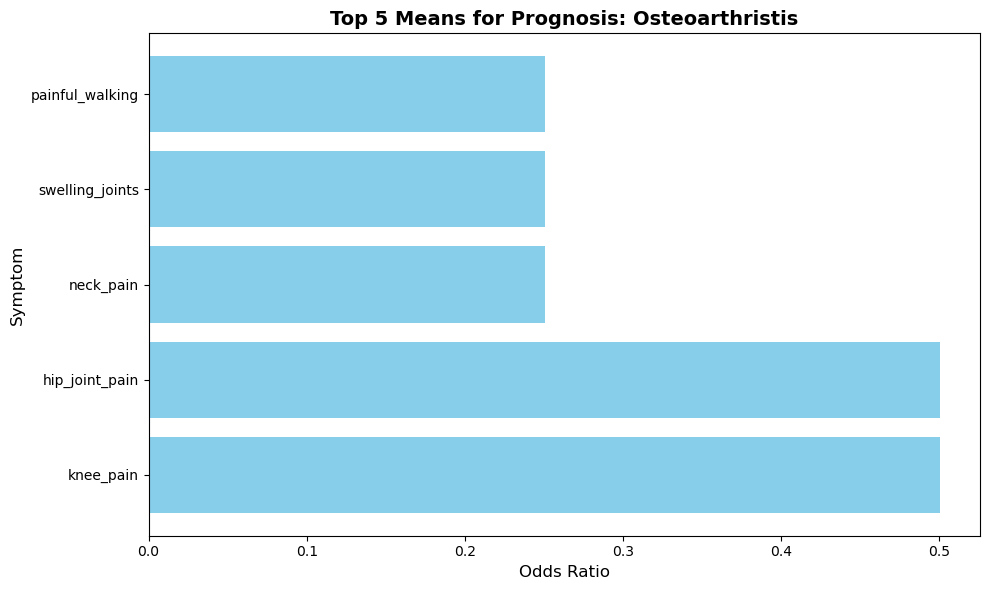

Prognosis: Arthritis
{'movement_stiffness': 0.5006242197253433, 'stiff_neck': 0.2506393861892583, 'swelling_joints': 0.2506393861892583, 'painful_walking': 0.2506393861892583, 'muscle_weakness': 0.24422994845530055}
----------------------------------------------------------------------------------------------------


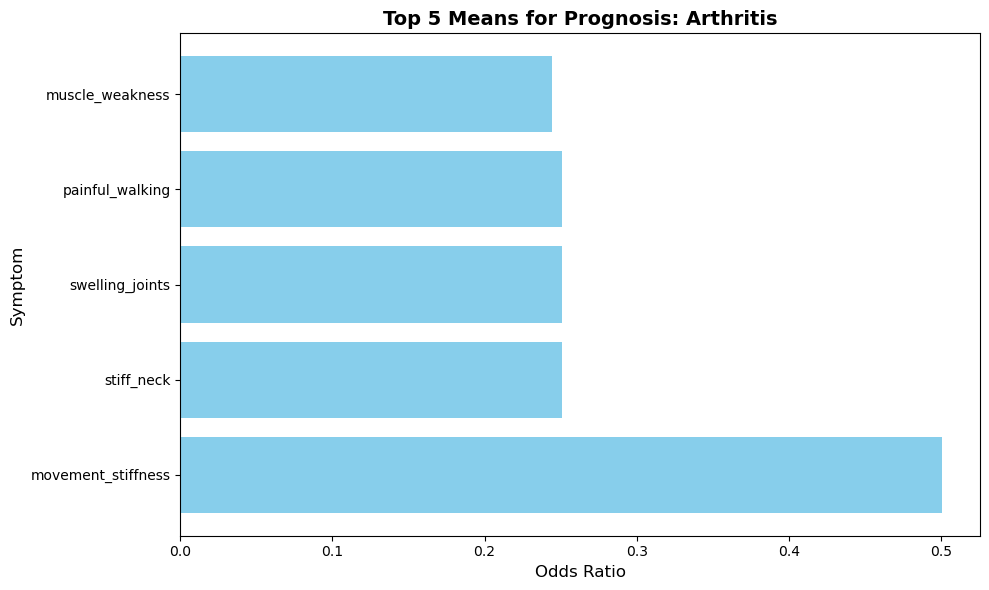

Prognosis: (vertigo) Paroymsal  Positional Vertigo
{'spinning_movements': 0.5012468827930174, 'unsteadiness': 0.5006242197253433, 'loss_of_balance': 0.1673219746614242, 'headache': 0.05105694329149162, 'nausea': 0.0505331324549064}
----------------------------------------------------------------------------------------------------


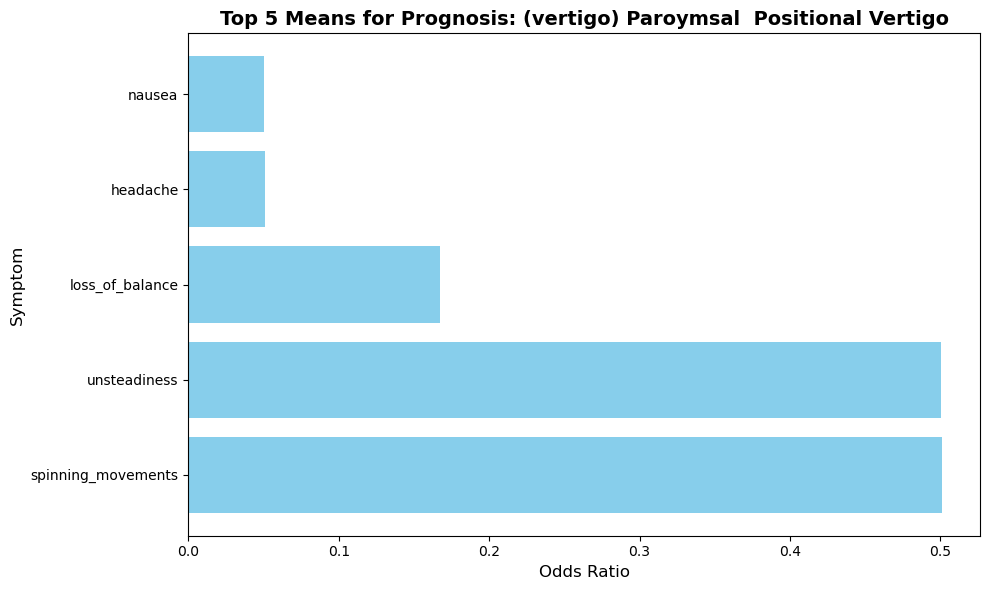

Prognosis: Acne
{'pus_filled_pimples': 0.5012468827930174, 'blackheads': 0.5012468827930174, 'scurring': 0.5012468827930174, 'skin_rash': 0.07324477337440033, 'fluid_overload': 0.024390243902439025}
----------------------------------------------------------------------------------------------------


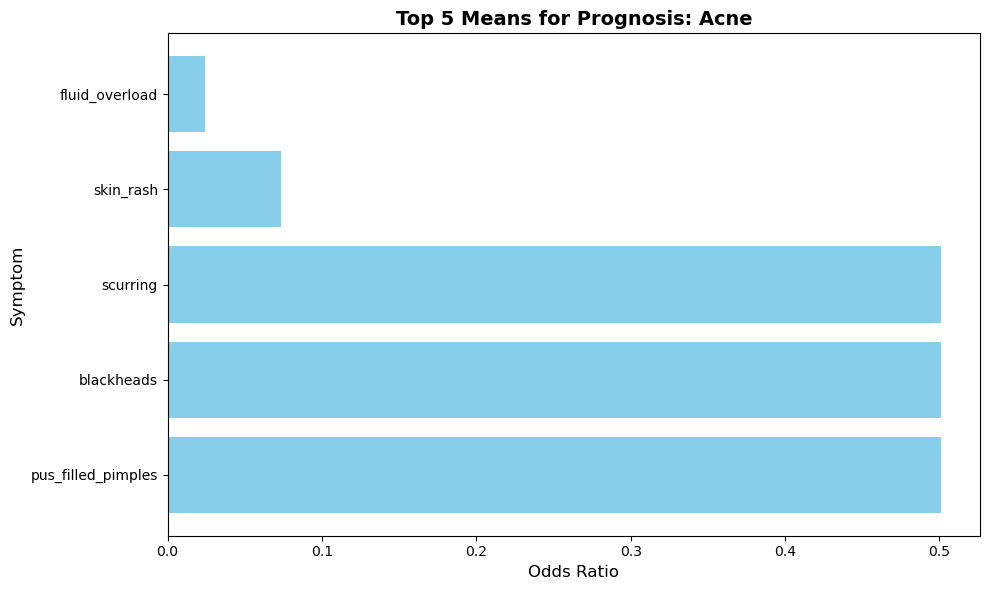

Prognosis: Urinary tract infection
{'foul_smell_of urine': 0.50186799501868, 'bladder_discomfort': 0.5006242197253433, 'continuous_feel_of_urine': 0.5006242197253433, 'burning_micturition': 0.2512755102040816, 'fluid_overload': 0.024390243902439025}
----------------------------------------------------------------------------------------------------


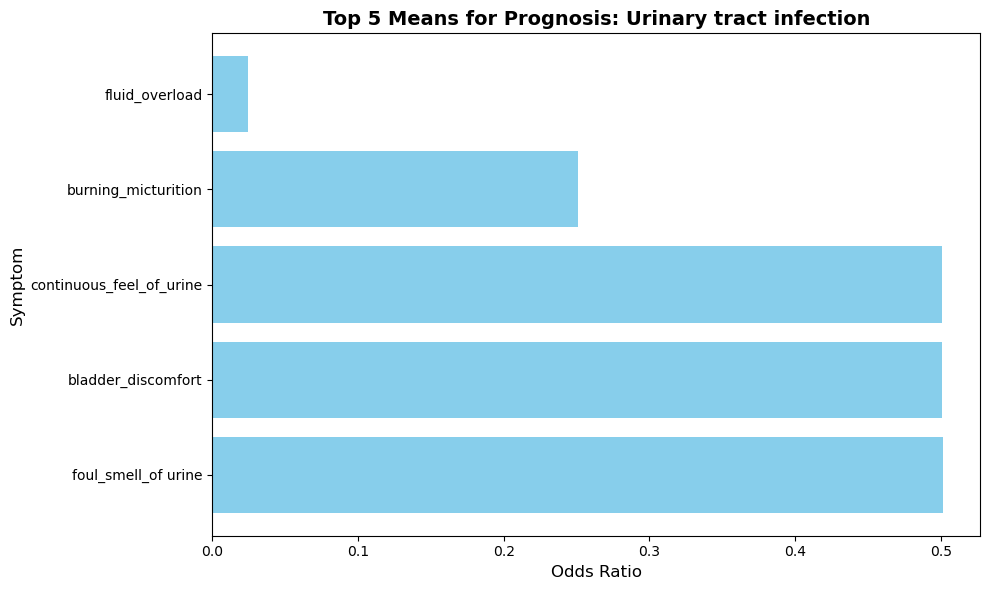

Prognosis: Psoriasis
{'skin_peeling': 0.5006242197253433, 'silver_like_dusting': 0.5006242197253433, 'small_dents_in_nails': 0.5006242197253433, 'inflammatory_nails': 0.5006242197253433, 'joint_pain': 0.08404154863078375}
----------------------------------------------------------------------------------------------------


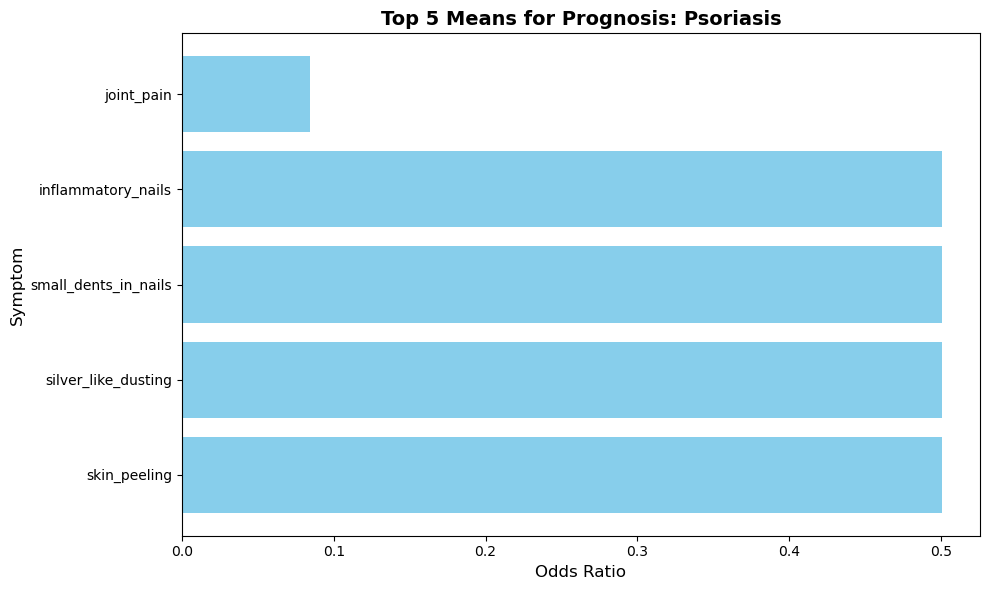

Prognosis: Impetigo
{'blister': 0.5006242197253433, 'red_sore_around_nose': 0.5006242197253433, 'yellow_crust_ooze': 0.5006242197253433, 'skin_rash': 0.07324477337440033, 'high_fever': 0.03997444488191901}
----------------------------------------------------------------------------------------------------


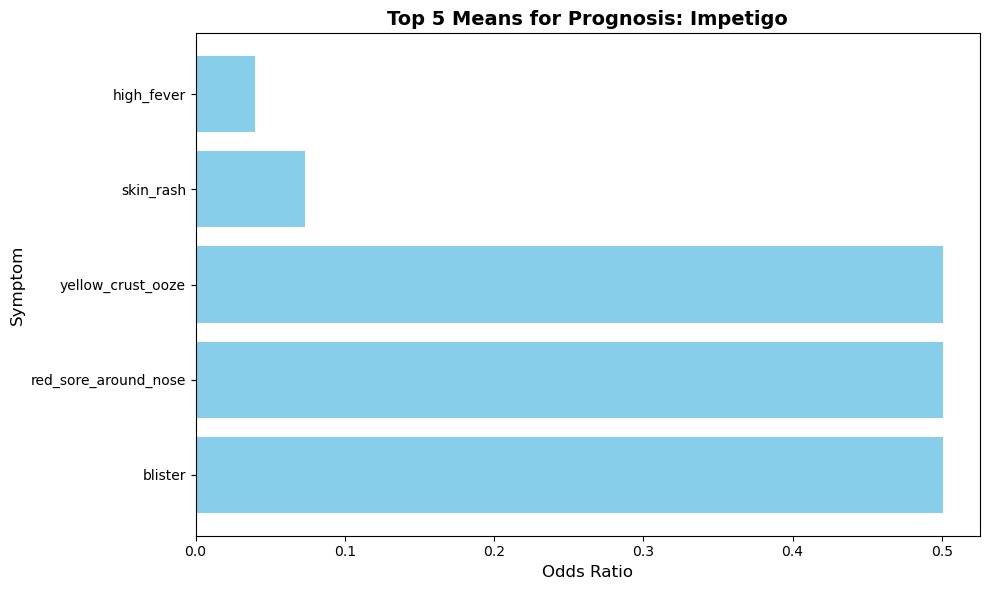

In [7]:
# Get unique prognosis classes from the 'prognosis' column
prognosis_classes = disease_training['prognosis'].unique()

# Initialize a dictionary to store odds ratios for plotting
odds_ratios_dict = {}

# Loop over each prognosis class and treat it as a binary target
for prognosis in prognosis_classes:
    # Convert prognosis to binary (1 if it's the current prognosis, 0 otherwise)
    disease_training['binary_prognosis'] = (disease_training['prognosis'] == prognosis).astype(int)

    # Calculate the odds ratio for each symptom
    odds = {
        c: disease_training.groupby(c)['binary_prognosis'].mean().mean()  # Ensure you get scalar mean values
        for c in disease_training.columns if c != 'prognosis' and c != 'binary_prognosis'
    }
    
    # Sort the odds ratios and select the top 5 symptoms
    sorted_odds = dict(sorted(odds.items(), key=lambda item: item[1], reverse=True)[:5])
    
    # Store the top 5 odds ratios for the current prognosis in the dictionary
    odds_ratios_dict[prognosis] = sorted_odds
    
    # Print the prognosis name and its corresponding odds ratios
    print(f"Prognosis: {prognosis}")
    print(sorted_odds)
    print("-" * 100)
    
    # Plotting top 5 odds ratios for each prognosis
    symptoms = list(sorted_odds.keys())
    odds_values = list(sorted_odds.values())
    
    # Create a new figure for each prognosis
    plt.figure(figsize=(10, 6))
    
    # Plot the bar chart
    plt.barh(symptoms, odds_values, color='skyblue')
    
    # Add labels and title
    plt.xlabel("Odds Ratio", fontsize=12)
    plt.ylabel("Symptom", fontsize=12)
    plt.title(f"Top 5 Means for Prognosis: {prognosis}", fontsize=14, weight='bold')
    
    # Show the plot
    plt.tight_layout()
    plt.show()
